In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
print(tf.__version__)

2.15.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt # used to plot fig
import seaborn as sns # used to plot fig as
import os  # This is used to read files to indict floders in the operating system
import cv2 # cv2 is used in opencv and deeplearning foe images transform, flip, change color and so on..

from sklearn.model_selection import train_test_split # this is used in Machine learning so i used it to split the train and test file 80/20 respectively
from tensorflow.keras.utils import to_categorical #Converts a class vector (integers) to binary class matrix.
from sklearn.preprocessing import LabelBinarizer  #Fit label binarizer and transform multi-class labels to binary labels
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Input, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
Data = np.load("/content/drive/MyDrive/MalariaP1Data_.npy")
Labels = np.load("/content/drive/MyDrive/MalariaP1Labels_.npy")

In [ ]:
Data = Data/255.0

In [ ]:
labelb = LabelBinarizer()
Lables = labelb.fit_transform(Labels)
Labels = to_categorical(Labels)

In [ ]:
(X_train, X_test, Y_train, Y_test) = train_test_split(Data, Labels, train_size=0.8, stratify = Labels, random_state =42)


In [ ]:
print(Y_train.shape)
print(X_test.shape)
print(X_train.shape)
print(Y_test.shape)

(3875, 2)
(969, 96, 96, 3)
(3875, 96, 96, 3)
(969, 2)


Shape of X_train: (3875, 96, 96, 3)
Data type of X_train: float64


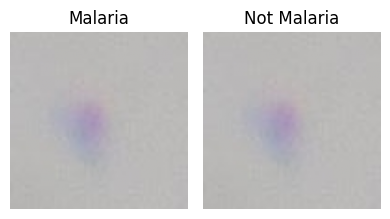

In [ ]:
# Verify shape and type
print("Shape of X_train:", X_train.shape)
print("Data type of X_train:", X_train.dtype)

class_labels = ['Malaria', 'Not Malaria']
# Plot one image from each class
num_classes = len(class_labels)
fig, axs = plt.subplots(1, num_classes, figsize=(4, 4))
if num_classes == 1:
    axs = [axs]

for i, ax in enumerate(axs):
    # Find the first image of the ith class
    idx = np.where(Y_train == i)[0][0]
    ax.imshow(X_train[idx])
    ax.set_title(class_labels[i])
    ax.axis('off')

plt.tight_layout()
plt.show()


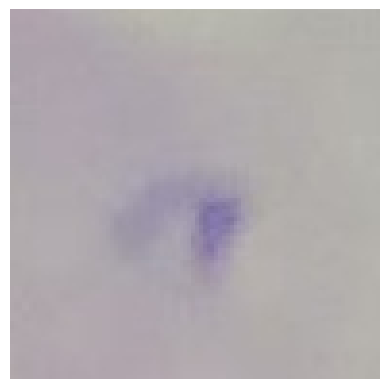

In [ ]:
idx = 10
plt.imshow(X_train[idx,:])
plt.axis('off');

In [ ]:
train_datagen = ImageDataGenerator(rotation_range = 20,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.05,
                                   shear_range = 0.2,
                                   zoom_range = 0.15,
                                   horizontal_flip = True,
                                   vertical_flip = False,
                                   fill_mode = "nearest")

# MobileNet V2

In [ ]:
from tensorflow.keras.layers import Resizing, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Nadam
import tensorflow as tf
import keras

IMG_SIZE = 96

# Define a function to create your Keras model using EfficientNetB0
def create_model(optimizer, learning_rate):
    # Define the inputs
    inputs = keras.Input(shape=(96, 96, 3))

    # Resize the inputs to the size expected by EfficientNetB0
    inputs_resized = Resizing(IMG_SIZE, IMG_SIZE)(inputs)

    # Load EfficientNetB0 as the base model, with pre-trained weights on ImageNet and without the top layer
    baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=inputs_resized)

    # Create the head of the model that will be placed on top of the base model
    headModel = GlobalAveragePooling2D()(baseModel.output)
    headModel = Dense(2, activation="sigmoid")(headModel)

    # Complete model setup
    model = Model(inputs=inputs, outputs=headModel)

    # Freeze the layers of the base model
    for layer in baseModel.layers:
        layer.trainable = False

    # Select optimizer
    opt = Nadam(learning_rate=learning_rate) if optimizer == 'NAdam' else SGD(learning_rate=learning_rate)

    # Compile the model
    model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
    return model



Training with optimizer=NAdam, learning_rate=0.0001
Epoch 1/250
122/122 [==============================] - ETA: 0s - loss: 0.6610 - accuracy: 0.6387
Epoch 1: val_accuracy improved from -inf to 0.72239, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


122/122 [==============================] - 9s 35ms/step - loss: 0.6610 - accuracy: 0.6387 - val_loss: 0.6066 - val_accuracy: 0.7224
Epoch 2/250
122/122 [==============================] - ETA: 0s - loss: 0.5881 - accuracy: 0.7285
Epoch 2: val_accuracy improved from 0.72239 to 0.75748, saving model to best_model.h5
122/122 [==============================] - 3s 23ms/step - loss: 0.5881 - accuracy: 0.7285 - val_loss: 0.5607 - val_accuracy: 0.7575
Epoch 3/250
120/122 [============================>.] - ETA: 0s - loss: 0.5526 - accuracy: 0.7651
Epoch 3: val_accuracy improved from 0.75748 to 0.78225, saving model to best_model.h5
122/122 [==============================] - 2s 20ms/step - loss: 0.5534 - accuracy: 0.7646 - val_loss: 0.5313 - val_accuracy: 0.7822
Epoch 4/250
120/122 [============================>.] - ETA: 0s - loss: 0.5264 - accuracy: 0.7844
Epoch 4: val_accuracy improved from 0.78225 to 0.80186, saving model to best_model.h5
122/122 [==============================] - 2s 20ms/step

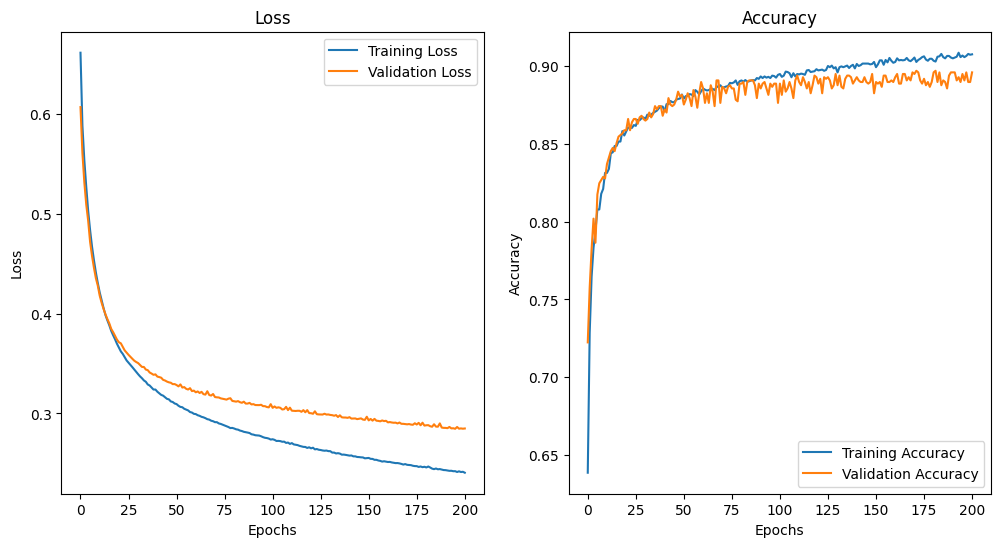


Training with optimizer=SGD, learning_rate=0.0001
Epoch 1/250
121/122 [============================>.] - ETA: 0s - loss: 0.6942 - accuracy: 0.5579
Epoch 1: val_accuracy improved from -inf to 0.60475, saving model to best_model.h5
122/122 [==============================] - 7s 33ms/step - loss: 0.6942 - accuracy: 0.5579 - val_loss: 0.6657 - val_accuracy: 0.6047
Epoch 2/250
118/122 [============================>.] - ETA: 0s - loss: 0.6685 - accuracy: 0.6094
Epoch 2: val_accuracy improved from 0.60475 to 0.63055, saving model to best_model.h5
122/122 [==============================] - 2s 19ms/step - loss: 0.6687 - accuracy: 0.6085 - val_loss: 0.6573 - val_accuracy: 0.6305
Epoch 3/250
119/122 [============================>.] - ETA: 0s - loss: 0.6634 - accuracy: 0.6208
Epoch 3: val_accuracy improved from 0.63055 to 0.63467, saving model to best_model.h5
122/122 [==============================] - 2s 17ms/step - loss: 0.6636 - accuracy: 0.6199 - val_loss: 0.6529 - val_accuracy: 0.6347
Epoch 4

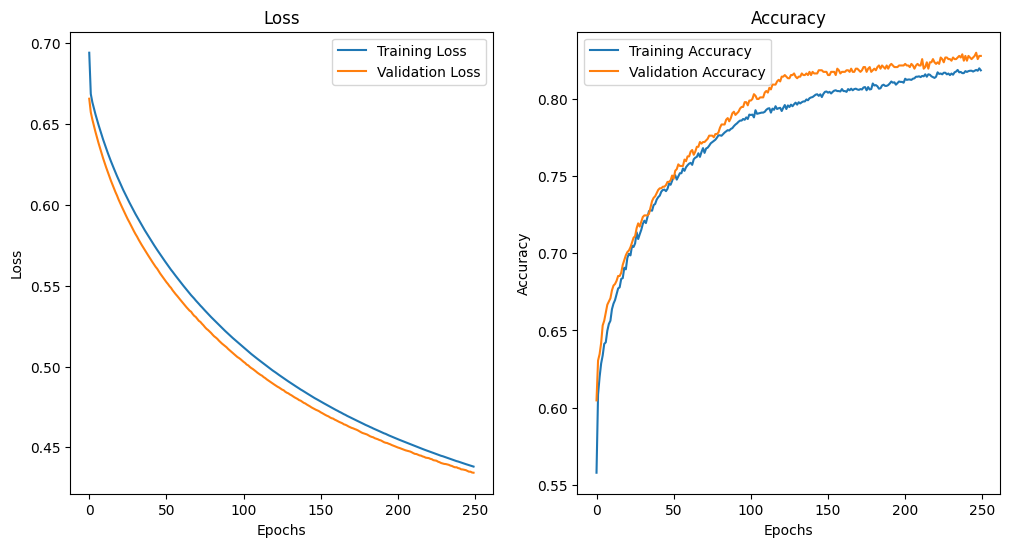


Training with optimizer=NAdam, learning_rate=0.001
Epoch 1/250
121/122 [============================>.] - ETA: 0s - loss: 0.5172 - accuracy: 0.7712
Epoch 1: val_accuracy improved from -inf to 0.81837, saving model to best_model.h5
122/122 [==============================] - 6s 29ms/step - loss: 0.5172 - accuracy: 0.7711 - val_loss: 0.4292 - val_accuracy: 0.8184
Epoch 2/250
121/122 [============================>.] - ETA: 0s - loss: 0.4034 - accuracy: 0.8342
Epoch 2: val_accuracy improved from 0.81837 to 0.85655, saving model to best_model.h5
122/122 [==============================] - 2s 20ms/step - loss: 0.4032 - accuracy: 0.8343 - val_loss: 0.3874 - val_accuracy: 0.8566
Epoch 3/250
119/122 [============================>.] - ETA: 0s - loss: 0.3666 - accuracy: 0.8529
Epoch 3: val_accuracy did not improve from 0.85655
122/122 [==============================] - 2s 18ms/step - loss: 0.3653 - accuracy: 0.8537 - val_loss: 0.3636 - val_accuracy: 0.8504
Epoch 4/250
118/122 [====================

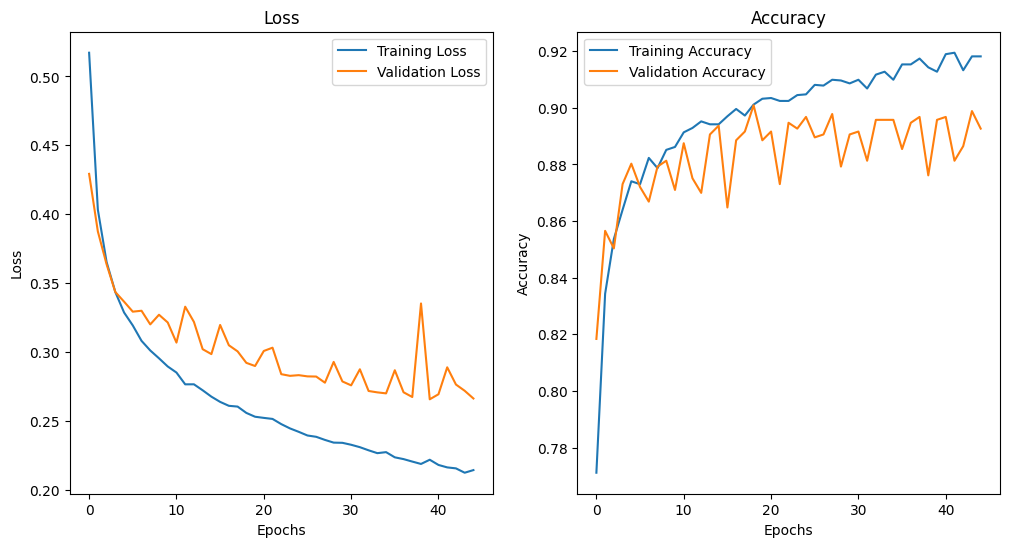


Training with optimizer=SGD, learning_rate=0.001
Epoch 1/250
122/122 [==============================] - ETA: 0s - loss: 0.6658 - accuracy: 0.6418
Epoch 1: val_accuracy improved from -inf to 0.67595, saving model to best_model.h5
122/122 [==============================] - 6s 30ms/step - loss: 0.6658 - accuracy: 0.6418 - val_loss: 0.6235 - val_accuracy: 0.6760
Epoch 2/250
118/122 [============================>.] - ETA: 0s - loss: 0.6162 - accuracy: 0.7113
Epoch 2: val_accuracy improved from 0.67595 to 0.75851, saving model to best_model.h5
122/122 [==============================] - 2s 17ms/step - loss: 0.6161 - accuracy: 0.7133 - val_loss: 0.5846 - val_accuracy: 0.7585
Epoch 3/250
119/122 [============================>.] - ETA: 0s - loss: 0.5907 - accuracy: 0.7403
Epoch 3: val_accuracy did not improve from 0.75851
122/122 [==============================] - 2s 17ms/step - loss: 0.5914 - accuracy: 0.7396 - val_loss: 0.5658 - val_accuracy: 0.7441
Epoch 4/250
121/122 [======================

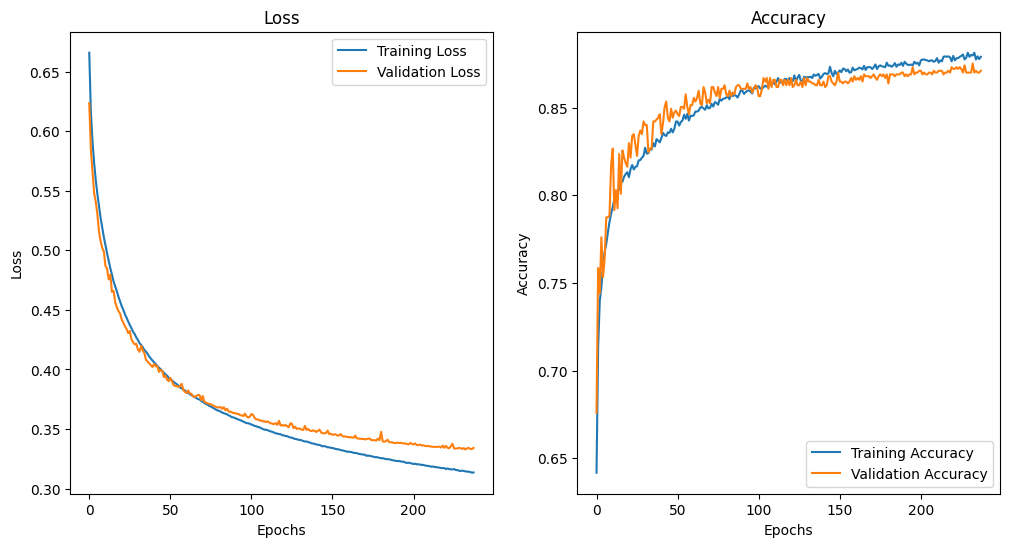

Best Model Parameters: {'optimizer': 'NAdam', 'learning_rate': 0.001}
Best Validation Accuracy: 0.900928795337677
31/31 [==============================] - 1s 14ms/step


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, accuracy_score

# Initialize the best model and its score
best_model = None
best_score = 0
best_params = {}

# Define the parameter grid
learning_rates = [1e-4, 1e-3]
optimizers = ['NAdam', 'SGD']

# Loop over the grid search parameters
for learning_rate in learning_rates:
    for optimizer_name in optimizers:
        print(f"\nTraining with optimizer={optimizer_name}, learning_rate={learning_rate}")
        model = create_model(optimizer=optimizer_name, learning_rate=learning_rate)

        # Save the best model checkpoint
        filepath = "best_model.h5"
        checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

        # Early stopping to avoid overfitting
        early_stopping = EarlyStopping(monitor='val_loss', patience=5)

        # Fit the model
        history = model.fit(
            #train_datagen.flow(X_train, Y_train, batch_size=8),
            X_train, Y_train,
            validation_data=(X_test, Y_test),
            epochs=250,
            callbacks=[checkpoint, early_stopping],
            verbose=1
        )

        # Evaluate the model
        val_accuracy = max(history.history['val_accuracy'])
        print(f"Validation accuracy: {val_accuracy}")

        # If this model is the best so far, store its information
        if val_accuracy > best_score:
            best_score = val_accuracy
            best_model = model
            best_params = {'optimizer': optimizer_name, 'learning_rate': learning_rate}

        # Display the loss and accuracy plots
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.show()

# Summarize best results
print(f"Best Model Parameters: {best_params}")
print(f"Best Validation Accuracy: {best_score}")

# Save the best model
best_model.save(filepath)

# Predict with the best model
best_model_predictions = best_model.predict(X_test, batch_size=32)
best_model_predictions = np.argmax(best_model_predictions, axis=1)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       484
           1       0.87      0.92      0.90       485

    accuracy                           0.89       969
   macro avg       0.89      0.89      0.89       969
weighted avg       0.89      0.89      0.89       969



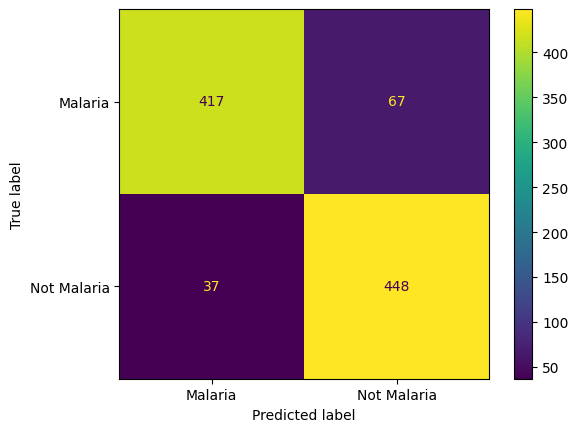

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

if Y_test.ndim > 1 and Y_test.shape[1] > 1:
    Y_test = Y_test.argmax(axis=1)

# Generate the classification report
print(classification_report(Y_test, best_model_predictions))

# Compute the confusion matrix
cm = confusion_matrix(Y_test, best_model_predictions)

# Plot the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels).plot()
plt.show()

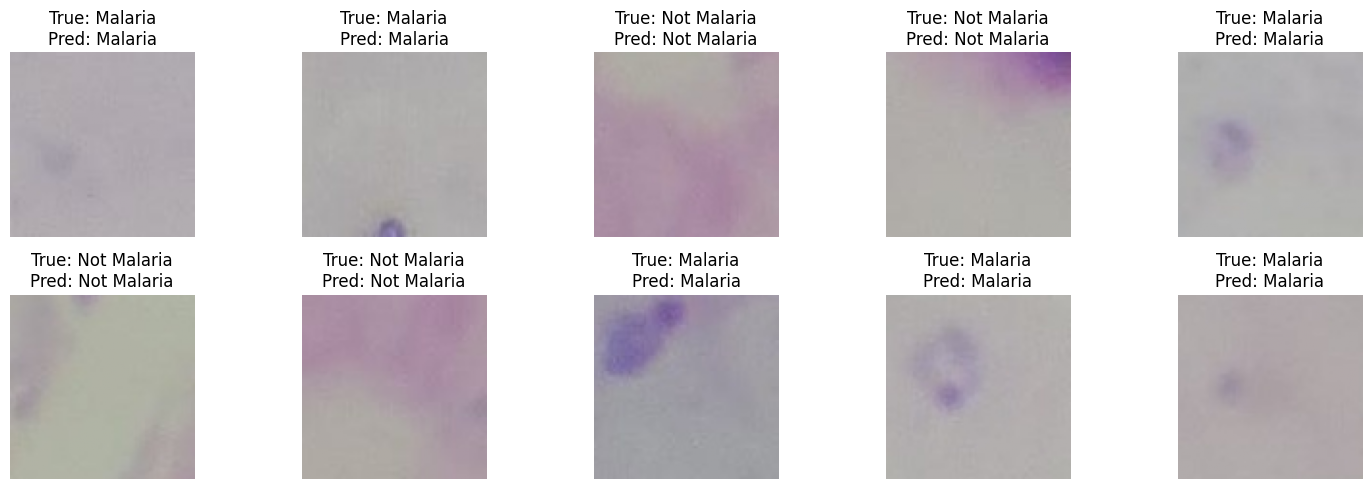

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def display_image_predictions(images, true_labels, predicted_labels, class_labels, num_images=10):
    # Select a random set of images from the dataset
    indices = np.random.choice(range(len(images)), num_images)

    plt.figure(figsize=(15, 5))
    for i, index in enumerate(indices):
        ax = plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(images[index])
        plt.axis('off')

        # If true_labels is one-hot encoded, convert to integers
        if true_labels.ndim > 1 and true_labels.shape[1] > 1:
            true_label_idx = true_labels[index].argmax()
        else:
            true_label_idx = int(true_labels[index])  # Make sure it is an integer

        predicted_label_idx = predicted_labels[index]

        # Set the title of the plot to the true label and predicted label
        ax.set_title(f"True: {class_labels[true_label_idx]}\nPred: {class_labels[predicted_label_idx]}")

    plt.tight_layout()  # Adjust the layout
    plt.show()

# Assuming Y_test is one-hot encoded and you've already obtained best_model_predictions
# and your class_labels are defined as before
display_image_predictions(X_test, Y_test, best_model_predictions, class_labels)

# DenseNet 121

In [ ]:
from tensorflow.keras.layers import Resizing, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Nadam
import tensorflow as tf
import keras
from tensorflow.keras.applications import DenseNet121

IMG_SIZE = 96

# Define a function to create your Keras model using DenseNet121
def create_model(optimizer, learning_rate):
    # Define the inputs
    inputs = keras.Input(shape=(96, 96, 3))

    # Resize the inputs to the size expected by DenseNet121
    inputs_resized = Resizing(IMG_SIZE, IMG_SIZE)(inputs)

    # Load DenseNet121 as the base model, with pre-trained weights on ImageNet and without the top layer
    baseModel = DenseNet121(weights="imagenet", include_top=False, input_tensor=inputs_resized)

    # Create the head of the model that will be placed on top of the base model
    headModel = GlobalAveragePooling2D()(baseModel.output)
    headModel = Dense(2, activation="sigmoid")(headModel)

    # Complete model setup
    model = Model(inputs=inputs, outputs=headModel)

    # Freeze the layers of the base model
    for layer in baseModel.layers:
        layer.trainable = False

    # Select optimizer
    opt = Nadam(learning_rate=learning_rate) if optimizer == 'NAdam' else SGD(learning_rate=learning_rate)

    # Compile the model
    model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
    return model



Training with optimizer=NAdam, learning_rate=0.0001
29084464/29084464 [==============================] - 0s 0us/step
Epoch 1/250
122/122 [==============================] - ETA: 0s - loss: 0.6763 - accuracy: 0.6191
Epoch 1: val_accuracy improved from -inf to 0.76780, saving model to best_model_Dense.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


122/122 [==============================] - 22s 88ms/step - loss: 0.6763 - accuracy: 0.6191 - val_loss: 0.6324 - val_accuracy: 0.7678
Epoch 2/250
120/122 [============================>.] - ETA: 0s - loss: 0.6033 - accuracy: 0.7982
Epoch 2: val_accuracy improved from 0.76780 to 0.81115, saving model to best_model_Dense.h5
122/122 [==============================] - 5s 41ms/step - loss: 0.6031 - accuracy: 0.7982 - val_loss: 0.5744 - val_accuracy: 0.8111
Epoch 3/250
121/122 [============================>.] - ETA: 0s - loss: 0.5519 - accuracy: 0.8270
Epoch 3: val_accuracy improved from 0.81115 to 0.82456, saving model to best_model_Dense.h5
122/122 [==============================] - 5s 43ms/step - loss: 0.5519 - accuracy: 0.8271 - val_loss: 0.5302 - val_accuracy: 0.8246
Epoch 4/250
120/122 [============================>.] - ETA: 0s - loss: 0.5115 - accuracy: 0.8393
Epoch 4: val_accuracy improved from 0.82456 to 0.83798, saving model to best_model_Dense.h5
122/122 [===========================

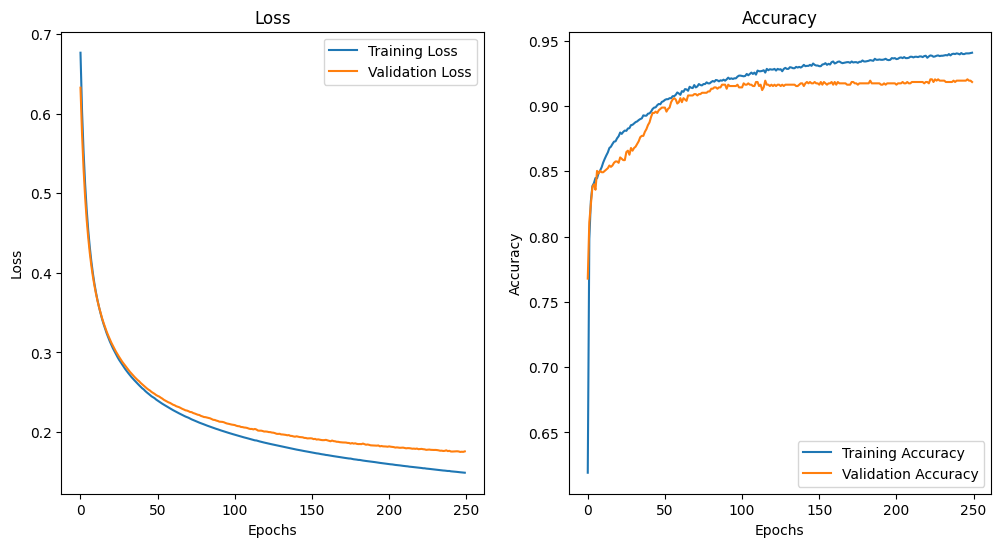


Training with optimizer=SGD, learning_rate=0.0001
Epoch 1/250
121/122 [============================>.] - ETA: 0s - loss: 0.7076 - accuracy: 0.5181
Epoch 1: val_accuracy improved from -inf to 0.53560, saving model to best_model_Dense.h5
122/122 [==============================] - 14s 58ms/step - loss: 0.7076 - accuracy: 0.5182 - val_loss: 0.6965 - val_accuracy: 0.5356
Epoch 2/250
120/122 [============================>.] - ETA: 0s - loss: 0.6865 - accuracy: 0.5516
Epoch 2: val_accuracy improved from 0.53560 to 0.56760, saving model to best_model_Dense.h5
122/122 [==============================] - 5s 43ms/step - loss: 0.6867 - accuracy: 0.5510 - val_loss: 0.6802 - val_accuracy: 0.5676
Epoch 3/250
120/122 [============================>.] - ETA: 0s - loss: 0.6721 - accuracy: 0.6031
Epoch 3: val_accuracy improved from 0.56760 to 0.61713, saving model to best_model_Dense.h5
122/122 [==============================] - 5s 44ms/step - loss: 0.6723 - accuracy: 0.6028 - val_loss: 0.6682 - val_accur

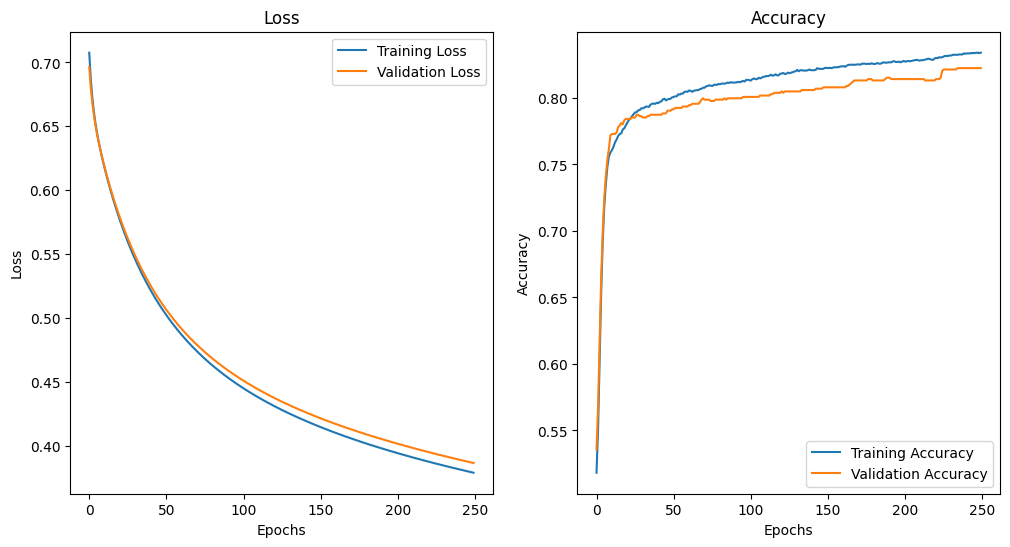


Training with optimizer=NAdam, learning_rate=0.001
Epoch 1/250
120/122 [============================>.] - ETA: 0s - loss: 0.5385 - accuracy: 0.7630
Epoch 1: val_accuracy improved from -inf to 0.85036, saving model to best_model_Dense.h5
122/122 [==============================] - 14s 65ms/step - loss: 0.5383 - accuracy: 0.7631 - val_loss: 0.3951 - val_accuracy: 0.8504
Epoch 2/250
121/122 [============================>.] - ETA: 0s - loss: 0.3583 - accuracy: 0.8608
Epoch 2: val_accuracy improved from 0.85036 to 0.86275, saving model to best_model_Dense.h5
122/122 [==============================] - 5s 43ms/step - loss: 0.3581 - accuracy: 0.8609 - val_loss: 0.3270 - val_accuracy: 0.8627
Epoch 3/250
121/122 [============================>.] - ETA: 0s - loss: 0.3090 - accuracy: 0.8758
Epoch 3: val_accuracy improved from 0.86275 to 0.86687, saving model to best_model_Dense.h5
122/122 [==============================] - 5s 41ms/step - loss: 0.3090 - accuracy: 0.8759 - val_loss: 0.2930 - val_accu

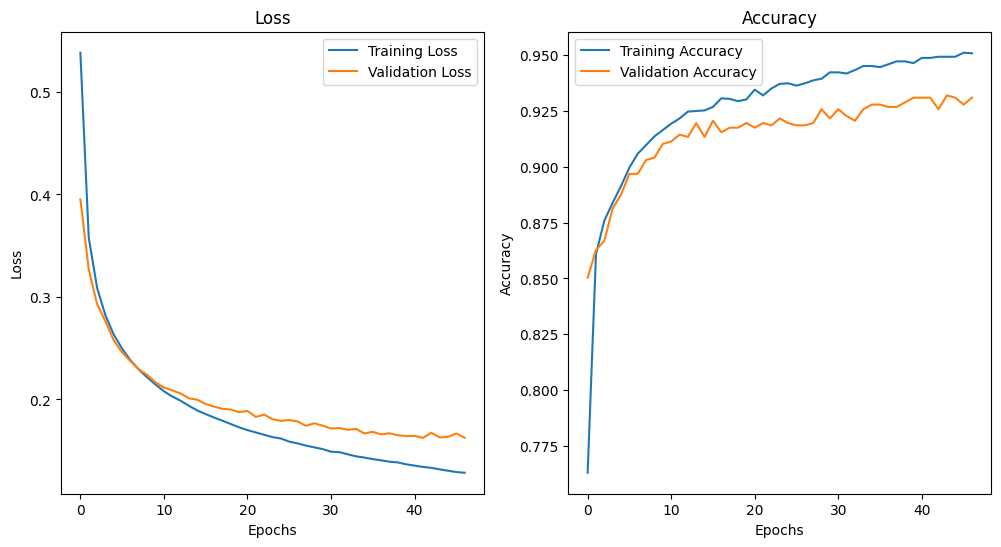


Training with optimizer=SGD, learning_rate=0.001
Epoch 1/250
120/122 [============================>.] - ETA: 0s - loss: 0.6768 - accuracy: 0.6536
Epoch 1: val_accuracy improved from -inf to 0.75335, saving model to best_model_Dense.h5
122/122 [==============================] - 13s 63ms/step - loss: 0.6764 - accuracy: 0.6545 - val_loss: 0.6338 - val_accuracy: 0.7534
Epoch 2/250
121/122 [============================>.] - ETA: 0s - loss: 0.6053 - accuracy: 0.7880
Epoch 2: val_accuracy improved from 0.75335 to 0.79360, saving model to best_model_Dense.h5
122/122 [==============================] - 5s 42ms/step - loss: 0.6052 - accuracy: 0.7881 - val_loss: 0.5887 - val_accuracy: 0.7936
Epoch 3/250
120/122 [============================>.] - ETA: 0s - loss: 0.5660 - accuracy: 0.7995
Epoch 3: val_accuracy improved from 0.79360 to 0.80289, saving model to best_model_Dense.h5
122/122 [==============================] - 5s 38ms/step - loss: 0.5656 - accuracy: 0.8000 - val_loss: 0.5551 - val_accura

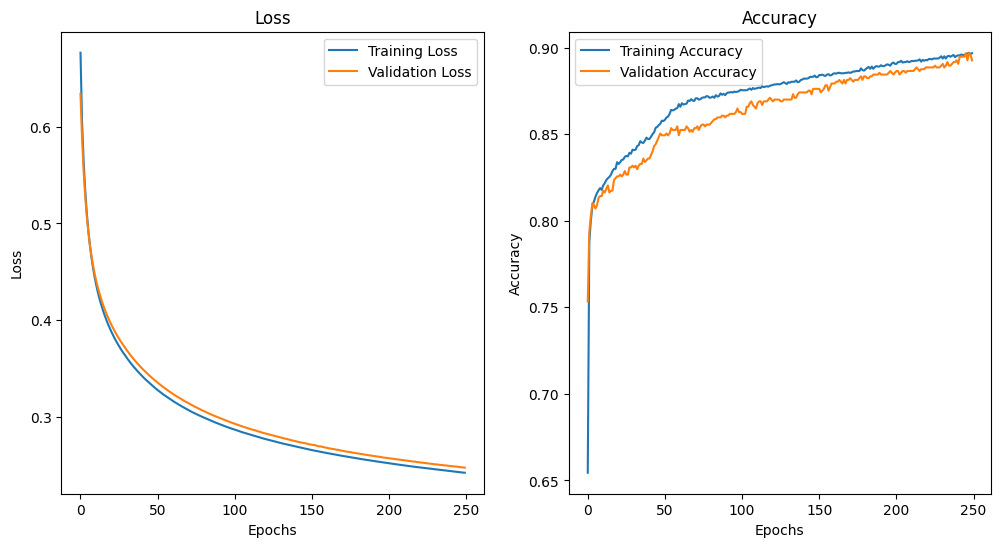

Best Model Parameters: {'optimizer': 'NAdam', 'learning_rate': 0.001}
Best Validation Accuracy: 0.9318885207176208
31/31 [==============================] - 3s 24ms/step


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, accuracy_score

# Initialize the best model and its score
best_model = None
best_score = 0
best_params = {}

# Define the parameter grid
learning_rates = [1e-4, 1e-3]
optimizers = ['NAdam', 'SGD']

# Loop over the grid search parameters
for learning_rate in learning_rates:
    for optimizer_name in optimizers:
        print(f"\nTraining with optimizer={optimizer_name}, learning_rate={learning_rate}")
        model = create_model(optimizer=optimizer_name, learning_rate=learning_rate)

        # Save the best model checkpoint
        filepath = "best_model_Dense.h5"
        checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

        # Early stopping to avoid overfitting
        early_stopping = EarlyStopping(monitor='val_loss', patience=5)

        # Fit the model
        history = model.fit(
            #train_datagen.flow(X_train, Y_train, batch_size=8),
            X_train, Y_train,
            validation_data=(X_test, Y_test),
            epochs=250,
            callbacks=[checkpoint, early_stopping],
            verbose=1
        )

        # Evaluate the model
        val_accuracy = max(history.history['val_accuracy'])
        print(f"Validation accuracy: {val_accuracy}")

        # If this model is the best so far, store its information
        if val_accuracy > best_score:
            best_score = val_accuracy
            best_model = model
            best_params = {'optimizer': optimizer_name, 'learning_rate': learning_rate}

        # Display the loss and accuracy plots
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.show()

# Summarize best results
print(f"Best Model Parameters: {best_params}")
print(f"Best Validation Accuracy: {best_score}")

# Save the best model
best_model.save(filepath)

# Predict with the best model
best_model_predictions = best_model.predict(X_test, batch_size=32)
best_model_predictions = np.argmax(best_model_predictions, axis=1)

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       484
           1       0.91      0.96      0.93       485

    accuracy                           0.93       969
   macro avg       0.93      0.93      0.93       969
weighted avg       0.93      0.93      0.93       969



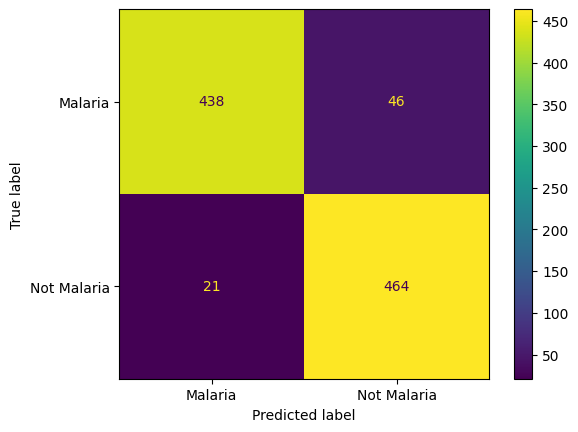

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

if Y_test.ndim > 1 and Y_test.shape[1] > 1:
    Y_test = Y_test.argmax(axis=1)

# Generate the classification report
print(classification_report(Y_test, best_model_predictions))

# Compute the confusion matrix
cm = confusion_matrix(Y_test, best_model_predictions)

# Plot the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels).plot()
plt.show()

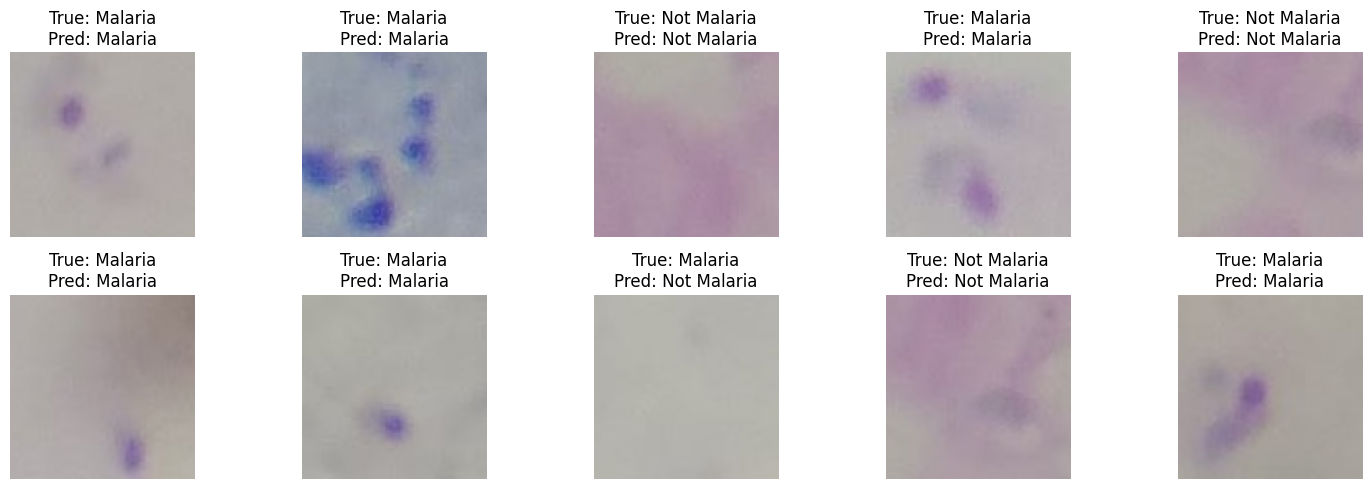

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def display_image_predictions(images, true_labels, predicted_labels, class_labels, num_images=10):
    # Select a random set of images from the dataset
    indices = np.random.choice(range(len(images)), num_images)

    plt.figure(figsize=(15, 5))
    for i, index in enumerate(indices):
        ax = plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(images[index])
        plt.axis('off')

        # If true_labels is one-hot encoded, convert to integers
        if true_labels.ndim > 1 and true_labels.shape[1] > 1:
            true_label_idx = true_labels[index].argmax()
        else:
            true_label_idx = int(true_labels[index])  # Make sure it is an integer

        predicted_label_idx = predicted_labels[index]

        # Set the title of the plot to the true label and predicted label
        ax.set_title(f"True: {class_labels[true_label_idx]}\nPred: {class_labels[predicted_label_idx]}")

    plt.tight_layout()  # Adjust the layout
    plt.show()

# Assuming Y_test is one-hot encoded and you've already obtained best_model_predictions
# and your class_labels are defined as before
display_image_predictions(X_test, Y_test, best_model_predictions, class_labels)

# EfficientNetB0

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Resizing, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Nadam
import tensorflow as tf
import keras

IMG_SIZE = 96

def create_efficientnetb0_model(optimizer, learning_rate):
    inputs = keras.Input(shape=(96, 96, 3))
    inputs_resized = Resizing(IMG_SIZE, IMG_SIZE)(inputs)
    baseModel = EfficientNetB0(weights="imagenet", include_top=False, input_tensor=inputs_resized)
    headModel = GlobalAveragePooling2D()(baseModel.output)
    headModel = Dense(2, activation="sigmoid")(headModel)
    model = Model(inputs=inputs, outputs=headModel)

    for layer in baseModel.layers:
        layer.trainable = False

    opt = Nadam(learning_rate=learning_rate) if optimizer == 'NAdam' else SGD(learning_rate=learning_rate)
    model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
    return model


Training with optimizer=NAdam, learning_rate=0.0001
Epoch 1/250
121/122 [============================>.] - ETA: 0s - loss: 0.7163 - accuracy: 0.4972
Epoch 1: val_accuracy improved from -inf to 0.51600, saving model to best_model_Eff.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


122/122 [==============================] - 14s 64ms/step - loss: 0.7163 - accuracy: 0.4973 - val_loss: 0.6626 - val_accuracy: 0.5160
Epoch 2/250
121/122 [============================>.] - ETA: 0s - loss: 0.6206 - accuracy: 0.6831
Epoch 2: val_accuracy improved from 0.51600 to 0.76574, saving model to best_model_Eff.h5
122/122 [==============================] - 5s 38ms/step - loss: 0.6204 - accuracy: 0.6834 - val_loss: 0.5958 - val_accuracy: 0.7657
Epoch 3/250
120/122 [============================>.] - ETA: 0s - loss: 0.5655 - accuracy: 0.7914
Epoch 3: val_accuracy improved from 0.76574 to 0.78741, saving model to best_model_Eff.h5
122/122 [==============================] - 5s 38ms/step - loss: 0.5652 - accuracy: 0.7917 - val_loss: 0.5485 - val_accuracy: 0.7874
Epoch 4/250
121/122 [============================>.] - ETA: 0s - loss: 0.5239 - accuracy: 0.8073
Epoch 4: val_accuracy improved from 0.78741 to 0.80392, saving model to best_model_Eff.h5
122/122 [==============================] -

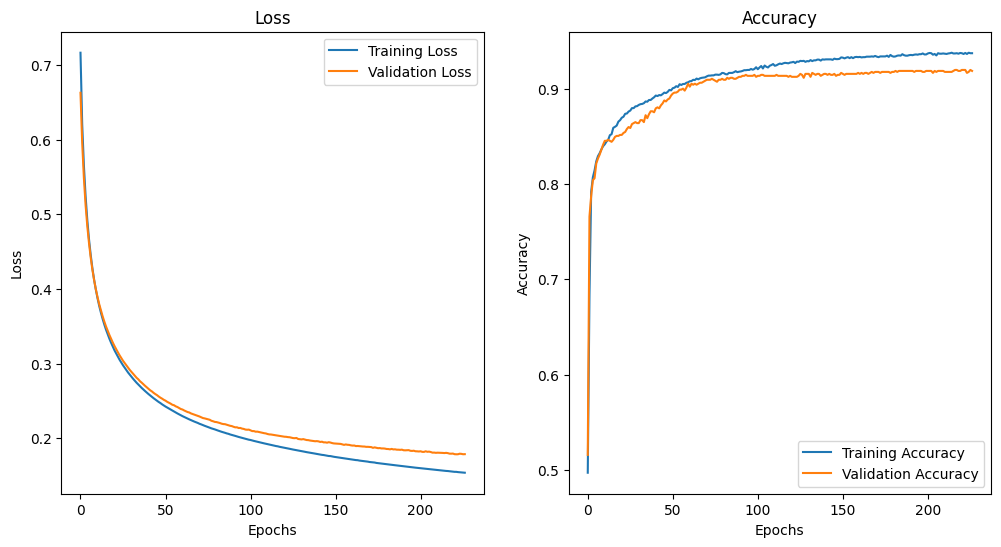


Training with optimizer=SGD, learning_rate=0.0001
Epoch 1/250
121/122 [============================>.] - ETA: 0s - loss: 0.7457 - accuracy: 0.5041
Epoch 1: val_accuracy improved from -inf to 0.50980, saving model to best_model_Eff.h5
122/122 [==============================] - 14s 61ms/step - loss: 0.7457 - accuracy: 0.5043 - val_loss: 0.7308 - val_accuracy: 0.5098
Epoch 2/250
121/122 [============================>.] - ETA: 0s - loss: 0.7161 - accuracy: 0.5189
Epoch 2: val_accuracy improved from 0.50980 to 0.53664, saving model to best_model_Eff.h5
122/122 [==============================] - 5s 42ms/step - loss: 0.7161 - accuracy: 0.5190 - val_loss: 0.7072 - val_accuracy: 0.5366
Epoch 3/250
120/122 [============================>.] - ETA: 0s - loss: 0.6959 - accuracy: 0.5492
Epoch 3: val_accuracy improved from 0.53664 to 0.56347, saving model to best_model_Eff.h5
122/122 [==============================] - 4s 37ms/step - loss: 0.6958 - accuracy: 0.5499 - val_loss: 0.6906 - val_accuracy: 0

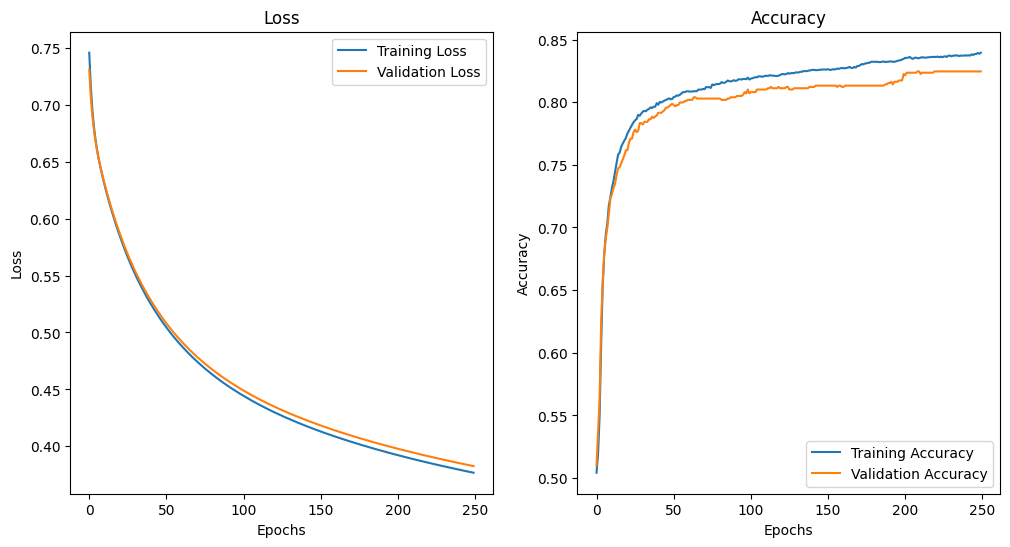


Training with optimizer=NAdam, learning_rate=0.001
Epoch 1/250
120/122 [============================>.] - ETA: 0s - loss: 0.4886 - accuracy: 0.8096
Epoch 1: val_accuracy improved from -inf to 0.84933, saving model to best_model_Eff.h5
122/122 [==============================] - 14s 65ms/step - loss: 0.4873 - accuracy: 0.8106 - val_loss: 0.3793 - val_accuracy: 0.8493
Epoch 2/250
120/122 [============================>.] - ETA: 0s - loss: 0.3426 - accuracy: 0.8641
Epoch 2: val_accuracy improved from 0.84933 to 0.85862, saving model to best_model_Eff.h5
122/122 [==============================] - 5s 42ms/step - loss: 0.3428 - accuracy: 0.8640 - val_loss: 0.3168 - val_accuracy: 0.8586
Epoch 3/250
122/122 [==============================] - ETA: 0s - loss: 0.2987 - accuracy: 0.8772
Epoch 3: val_accuracy improved from 0.85862 to 0.86584, saving model to best_model_Eff.h5
122/122 [==============================] - 5s 41ms/step - loss: 0.2987 - accuracy: 0.8772 - val_loss: 0.2868 - val_accuracy: 

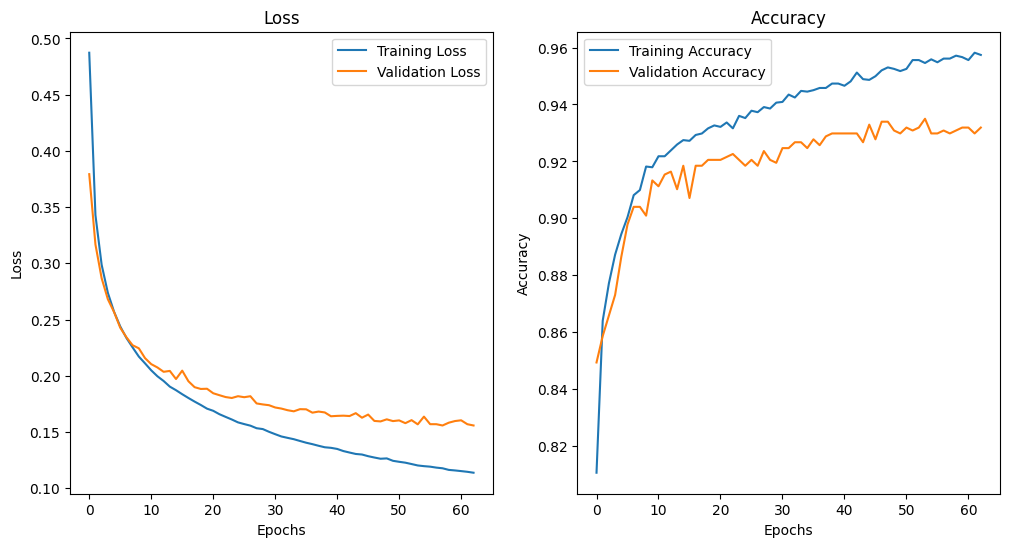


Training with optimizer=SGD, learning_rate=0.001
Epoch 1/250
121/122 [============================>.] - ETA: 0s - loss: 0.6745 - accuracy: 0.6459
Epoch 1: val_accuracy improved from -inf to 0.75645, saving model to best_model_Eff.h5
122/122 [==============================] - 14s 66ms/step - loss: 0.6745 - accuracy: 0.6459 - val_loss: 0.6356 - val_accuracy: 0.7564
Epoch 2/250
121/122 [============================>.] - ETA: 0s - loss: 0.6144 - accuracy: 0.7670
Epoch 2: val_accuracy improved from 0.75645 to 0.78638, saving model to best_model_Eff.h5
122/122 [==============================] - 5s 43ms/step - loss: 0.6143 - accuracy: 0.7670 - val_loss: 0.5902 - val_accuracy: 0.7864
Epoch 3/250
121/122 [============================>.] - ETA: 0s - loss: 0.5736 - accuracy: 0.7918
Epoch 3: val_accuracy improved from 0.78638 to 0.79979, saving model to best_model_Eff.h5
122/122 [==============================] - 5s 40ms/step - loss: 0.5736 - accuracy: 0.7920 - val_loss: 0.5555 - val_accuracy: 0.

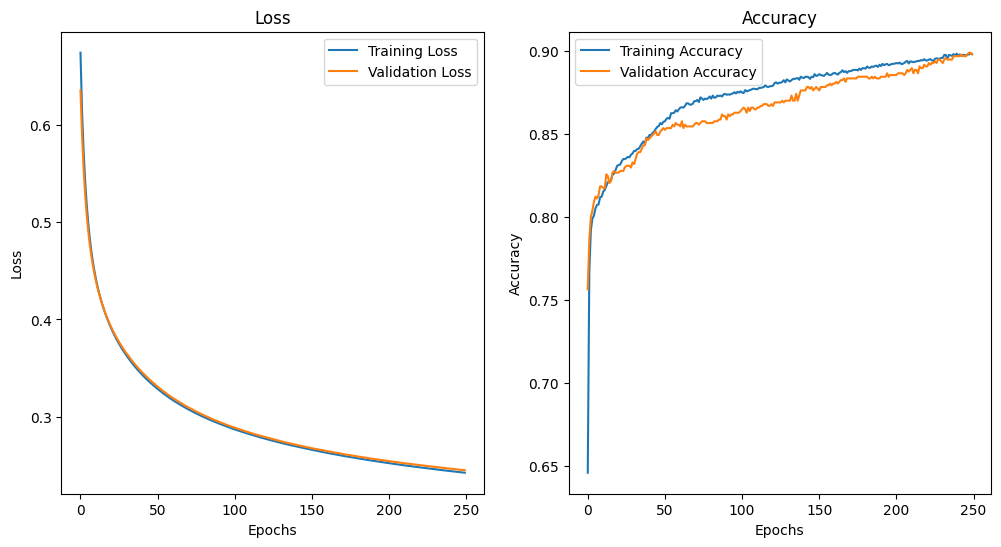

Best Model Parameters: {'optimizer': 'NAdam', 'learning_rate': 0.001}
Best Validation Accuracy: 0.9349845051765442
31/31 [==============================] - 3s 30ms/step


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

# Initialize the best model and its score
best_model = None
best_score = 0
best_params = {}

# Define the parameter grid
learning_rates = [1e-4, 1e-3]
optimizers = ['NAdam', 'SGD']

# Loop over the grid search parameters
for learning_rate in learning_rates:
    for optimizer_name in optimizers:
        print(f"\nTraining with optimizer={optimizer_name}, learning_rate={learning_rate}")
        model = create_model(optimizer=optimizer_name, learning_rate=learning_rate)

        # Save the best model checkpoint
        filepath = "best_model_Eff.h5"
        checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

        # Early stopping to avoid overfitting
        early_stopping = EarlyStopping(monitor='val_loss', patience=5)

        # Fit the model
        history = model.fit(
            X_train, Y_train,
            validation_data=(X_test, Y_test),
            epochs=250,
            callbacks=[checkpoint, early_stopping],
            verbose=1
        )

        # Evaluate the model
        val_accuracy = max(history.history['val_accuracy'])
        print(f"Validation accuracy: {val_accuracy}")

        # If this model is the best so far, store its information
        if val_accuracy > best_score:
            best_score = val_accuracy
            best_model = model
            best_params = {'optimizer': optimizer_name, 'learning_rate': learning_rate}

        # Display the loss and accuracy plots
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.show()

# Summarize best results
print(f"Best Model Parameters: {best_params}")
print(f"Best Validation Accuracy: {best_score}")

# Save the best model
best_model.save(filepath)

# Predict with the best model
best_model_predictions = best_model.predict(X_test, batch_size=32)
best_model_predictions = (best_model_predictions > 0.5).astype("int32").flatten()


31/31 [==============================] - 30s 896ms/step
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       484
           1       0.92      0.95      0.93       485

    accuracy                           0.93       969
   macro avg       0.93      0.93      0.93       969
weighted avg       0.93      0.93      0.93       969



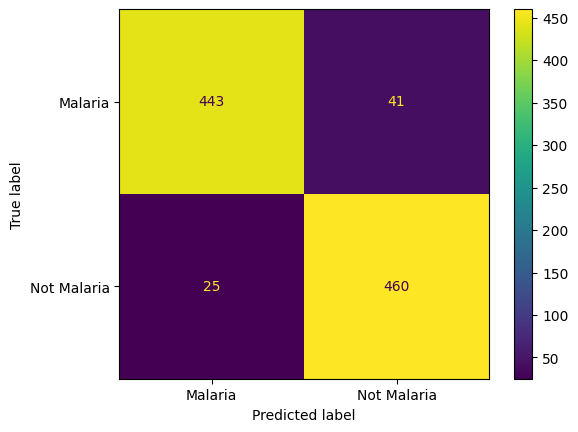

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Load the best saved model
best_model = load_model('/content/best_model_Eff.h5')

# Predict with the best model
best_model_predictions = best_model.predict(X_test, batch_size=32)

# Ensure the predictions are in the correct shape
if best_model_predictions.shape[1] == 2:  # Check if the predictions are for both classes
    best_model_predictions = np.argmax(best_model_predictions, axis=1)  # Get the class with the highest probability
else:
    best_model_predictions = (best_model_predictions > 0.5).astype("int32").flatten()

# Ensure Y_test is in the correct shape
if Y_test.ndim > 1 and Y_test.shape[1] > 1:
    Y_test = Y_test.argmax(axis=1)  # Convert one-hot encoded labels to class labels

# Generate the classification report
print(classification_report(Y_test, best_model_predictions))

# Compute the confusion matrix
cm = confusion_matrix(Y_test, best_model_predictions)

# Plot the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels).plot()
plt.show()


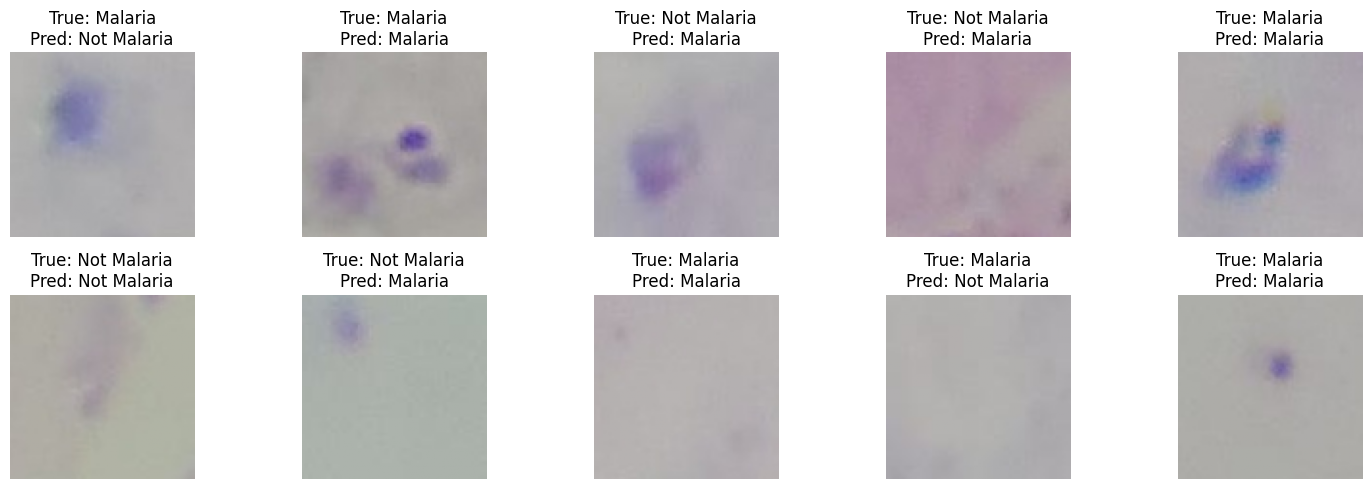

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def display_image_predictions(images, true_labels, predicted_labels, class_labels, num_images=10):
    # Select a random set of images from the dataset
    indices = np.random.choice(range(len(images)), num_images)

    plt.figure(figsize=(15, 5))
    for i, index in enumerate(indices):
        ax = plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(images[index])
        plt.axis('off')

        # If true_labels is one-hot encoded, convert to integers
        if true_labels.ndim > 1 and true_labels.shape[1] > 1:
            true_label_idx = true_labels[index].argmax()
        else:
            true_label_idx = int(true_labels[index])  # Make sure it is an integer

        predicted_label_idx = predicted_labels[index]

        # Set the title of the plot to the true label and predicted label
        ax.set_title(f"True: {class_labels[true_label_idx]}\nPred: {class_labels[predicted_label_idx]}")

    plt.tight_layout()  # Adjust the layout
    plt.show()

# Assuming Y_test is one-hot encoded and you've already obtained best_model_predictions
# and your class_labels are defined as before
display_image_predictions(X_test, Y_test, best_model_predictions, class_labels)

# InceptionV3

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Resizing, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Nadam
import tensorflow as tf
import keras

IMG_SIZE = 96

def create_inception_model(optimizer, learning_rate):
    inputs = keras.Input(shape=(96, 96, 3))
    inputs_resized = Resizing(IMG_SIZE, IMG_SIZE)(inputs)
    baseModel = InceptionV3(weights="imagenet", include_top=False, input_tensor=inputs_resized)
    headModel = GlobalAveragePooling2D()(baseModel.output)
    headModel = Dense(2, activation="sigmoid")(headModel)
    model = Model(inputs=inputs, outputs=headModel)

    for layer in baseModel.layers:
        layer.trainable = False

    opt = Nadam(learning_rate=learning_rate) if optimizer == 'NAdam' else SGD(learning_rate=learning_rate)
    model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
    return model

# Training and evaluation loop as in the original example



Training with optimizer=NAdam, learning_rate=0.0001
Epoch 1/250
120/122 [============================>.] - ETA: 0s - loss: 0.6917 - accuracy: 0.6049
Epoch 1: val_accuracy improved from -inf to 0.69040, saving model to best_model_InceptionV3.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


122/122 [==============================] - 14s 63ms/step - loss: 0.6913 - accuracy: 0.6057 - val_loss: 0.6516 - val_accuracy: 0.6904
Epoch 2/250
121/122 [============================>.] - ETA: 0s - loss: 0.6194 - accuracy: 0.7456
Epoch 2: val_accuracy improved from 0.69040 to 0.76161, saving model to best_model_InceptionV3.h5
122/122 [==============================] - 5s 39ms/step - loss: 0.6194 - accuracy: 0.7455 - val_loss: 0.5901 - val_accuracy: 0.7616
Epoch 3/250
120/122 [============================>.] - ETA: 0s - loss: 0.5671 - accuracy: 0.7857
Epoch 3: val_accuracy improved from 0.76161 to 0.79463, saving model to best_model_InceptionV3.h5
122/122 [==============================] - 5s 42ms/step - loss: 0.5663 - accuracy: 0.7871 - val_loss: 0.5435 - val_accuracy: 0.7946
Epoch 4/250
121/122 [============================>.] - ETA: 0s - loss: 0.5251 - accuracy: 0.8076
Epoch 4: val_accuracy improved from 0.79463 to 0.81321, saving model to best_model_InceptionV3.h5
122/122 [=========

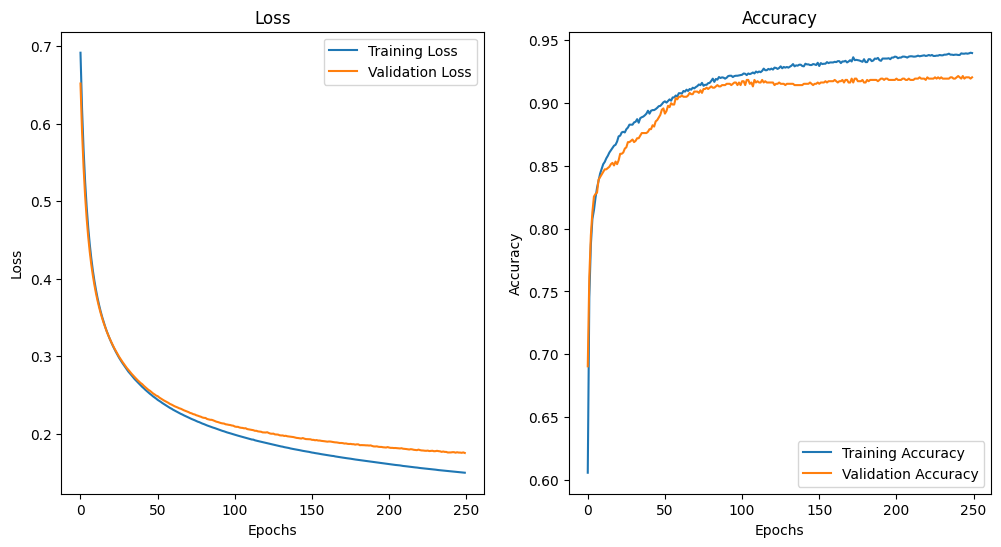


Training with optimizer=SGD, learning_rate=0.0001
Epoch 1/250
120/122 [============================>.] - ETA: 0s - loss: 0.7597 - accuracy: 0.4096
Epoch 1: val_accuracy improved from -inf to 0.42002, saving model to best_model_InceptionV3.h5
122/122 [==============================] - 14s 61ms/step - loss: 0.7599 - accuracy: 0.4085 - val_loss: 0.7493 - val_accuracy: 0.4200
Epoch 2/250
121/122 [============================>.] - ETA: 0s - loss: 0.7396 - accuracy: 0.4223
Epoch 2: val_accuracy improved from 0.42002 to 0.43344, saving model to best_model_InceptionV3.h5
122/122 [==============================] - 7s 55ms/step - loss: 0.7397 - accuracy: 0.4219 - val_loss: 0.7317 - val_accuracy: 0.4334
Epoch 3/250
121/122 [============================>.] - ETA: 0s - loss: 0.7243 - accuracy: 0.4360
Epoch 3: val_accuracy improved from 0.43344 to 0.44169, saving model to best_model_InceptionV3.h5
122/122 [==============================] - 5s 44ms/step - loss: 0.7243 - accuracy: 0.4359 - val_loss: 

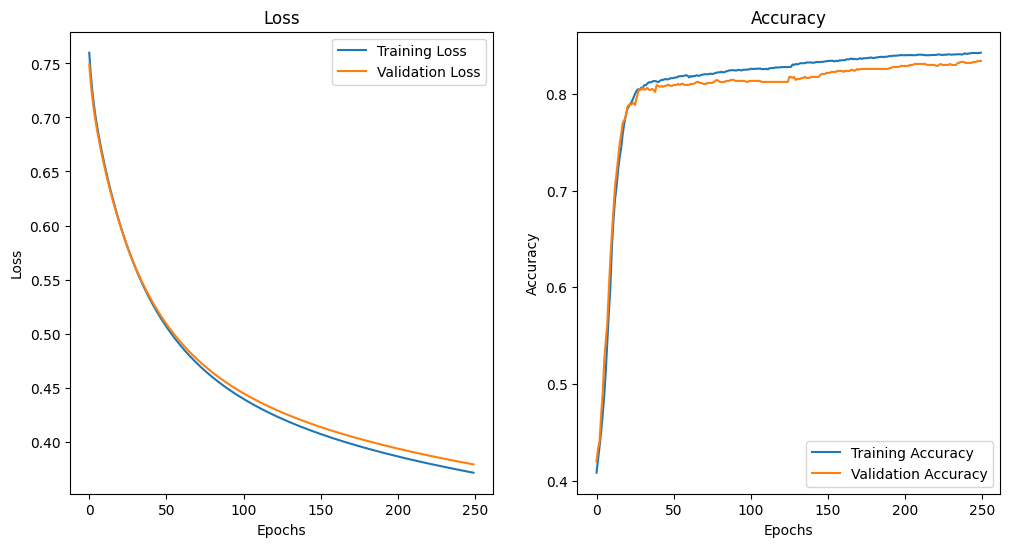


Training with optimizer=NAdam, learning_rate=0.001
Epoch 1/250
121/122 [============================>.] - ETA: 0s - loss: 0.4731 - accuracy: 0.8107
Epoch 1: val_accuracy improved from -inf to 0.84727, saving model to best_model_InceptionV3.h5
122/122 [==============================] - 15s 70ms/step - loss: 0.4731 - accuracy: 0.8106 - val_loss: 0.3752 - val_accuracy: 0.8473
Epoch 2/250
121/122 [============================>.] - ETA: 0s - loss: 0.3415 - accuracy: 0.8634
Epoch 2: val_accuracy improved from 0.84727 to 0.85965, saving model to best_model_InceptionV3.h5
122/122 [==============================] - 5s 43ms/step - loss: 0.3415 - accuracy: 0.8635 - val_loss: 0.3156 - val_accuracy: 0.8596
Epoch 3/250
121/122 [============================>.] - ETA: 0s - loss: 0.2978 - accuracy: 0.8778
Epoch 3: val_accuracy improved from 0.85965 to 0.86791, saving model to best_model_InceptionV3.h5
122/122 [==============================] - 5s 40ms/step - loss: 0.2978 - accuracy: 0.8779 - val_loss:

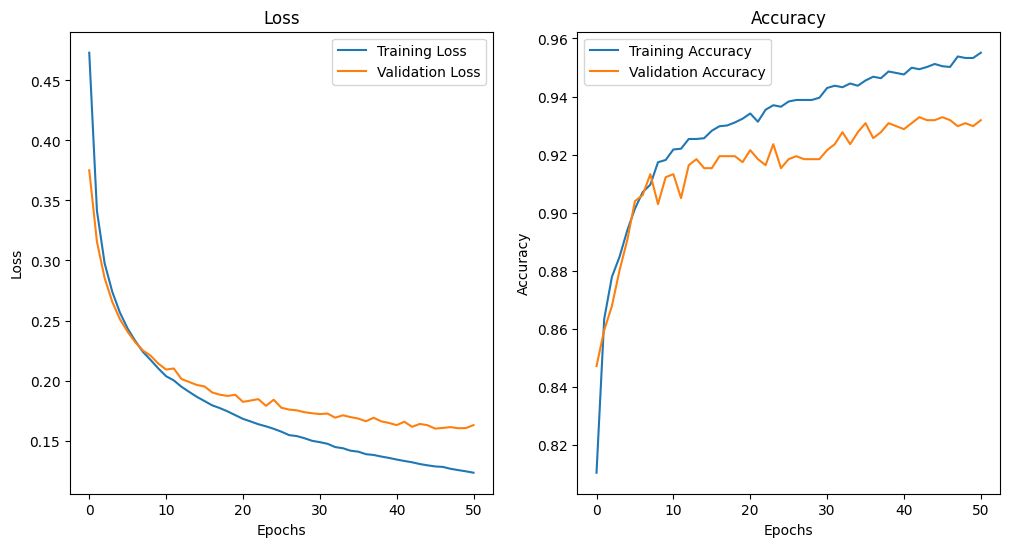


Training with optimizer=SGD, learning_rate=0.001
Epoch 1/250
121/122 [============================>.] - ETA: 0s - loss: 0.6984 - accuracy: 0.5302
Epoch 1: val_accuracy improved from -inf to 0.64499, saving model to best_model_InceptionV3.h5
122/122 [==============================] - 14s 67ms/step - loss: 0.6984 - accuracy: 0.5306 - val_loss: 0.6538 - val_accuracy: 0.6450
Epoch 2/250
121/122 [============================>.] - ETA: 0s - loss: 0.6269 - accuracy: 0.7562
Epoch 2: val_accuracy improved from 0.64499 to 0.79670, saving model to best_model_InceptionV3.h5
122/122 [==============================] - 5s 43ms/step - loss: 0.6269 - accuracy: 0.7561 - val_loss: 0.5987 - val_accuracy: 0.7967
Epoch 3/250
120/122 [============================>.] - ETA: 0s - loss: 0.5792 - accuracy: 0.8096
Epoch 3: val_accuracy improved from 0.79670 to 0.80599, saving model to best_model_InceptionV3.h5
122/122 [==============================] - 5s 40ms/step - loss: 0.5789 - accuracy: 0.8106 - val_loss: 0

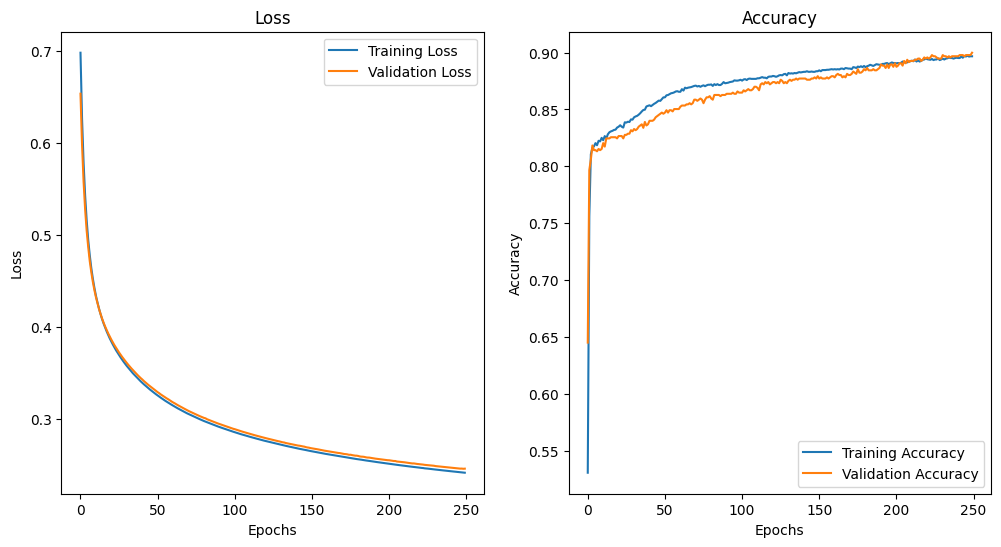

Best Model Parameters: {'optimizer': 'NAdam', 'learning_rate': 0.001}
Best Validation Accuracy: 0.932920515537262
31/31 [==============================] - 3s 25ms/step


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

# Initialize the best model and its score
best_model = None
best_score = 0
best_params = {}

# Define the parameter grid
learning_rates = [1e-4, 1e-3]
optimizers = ['NAdam', 'SGD']

# Loop over the grid search parameters
for learning_rate in learning_rates:
    for optimizer_name in optimizers:
        print(f"\nTraining with optimizer={optimizer_name}, learning_rate={learning_rate}")
        model = create_model(optimizer=optimizer_name, learning_rate=learning_rate)

        # Save the best model checkpoint
        filepath = "best_model_InceptionV3.h5"
        checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

        # Early stopping to avoid overfitting
        early_stopping = EarlyStopping(monitor='val_loss', patience=5)

        # Fit the model
        history = model.fit(
            X_train, Y_train,
            validation_data=(X_test, Y_test),
            epochs=250,
            callbacks=[checkpoint, early_stopping],
            verbose=1
        )

        # Evaluate the model
        val_accuracy = max(history.history['val_accuracy'])
        print(f"Validation accuracy: {val_accuracy}")

        # If this model is the best so far, store its information
        if val_accuracy > best_score:
            best_score = val_accuracy
            best_model = model
            best_params = {'optimizer': optimizer_name, 'learning_rate': learning_rate}

        # Display the loss and accuracy plots
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.show()

# Summarize best results
print(f"Best Model Parameters: {best_params}")
print(f"Best Validation Accuracy: {best_score}")

# Save the best model
best_model.save(filepath)

# Predict with the best model
best_model_predictions = best_model.predict(X_test, batch_size=32)
best_model_predictions = (best_model_predictions > 0.5).astype("int32").flatten()


31/31 [==============================] - 30s 901ms/step
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       484
           1       0.91      0.96      0.93       485

    accuracy                           0.93       969
   macro avg       0.93      0.93      0.93       969
weighted avg       0.93      0.93      0.93       969



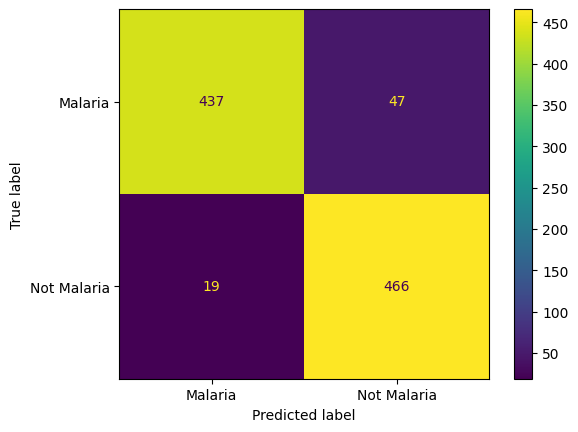

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Load the best saved model
best_model = load_model('/content/best_model_InceptionV3.h5')

# Predict with the best model
best_model_predictions = best_model.predict(X_test, batch_size=32)

# Ensure the predictions are in the correct shape
if best_model_predictions.shape[1] == 2:  # Check if the predictions are for both classes
    best_model_predictions = np.argmax(best_model_predictions, axis=1)  # Get the class with the highest probability
else:
    best_model_predictions = (best_model_predictions > 0.5).astype("int32").flatten()

# Ensure Y_test is in the correct shape
if Y_test.ndim > 1 and Y_test.shape[1] > 1:
    Y_test = Y_test.argmax(axis=1)  # Convert one-hot encoded labels to class labels

# Generate the classification report
print(classification_report(Y_test, best_model_predictions))

# Compute the confusion matrix
cm = confusion_matrix(Y_test, best_model_predictions)

# Plot the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels).plot()
plt.show()


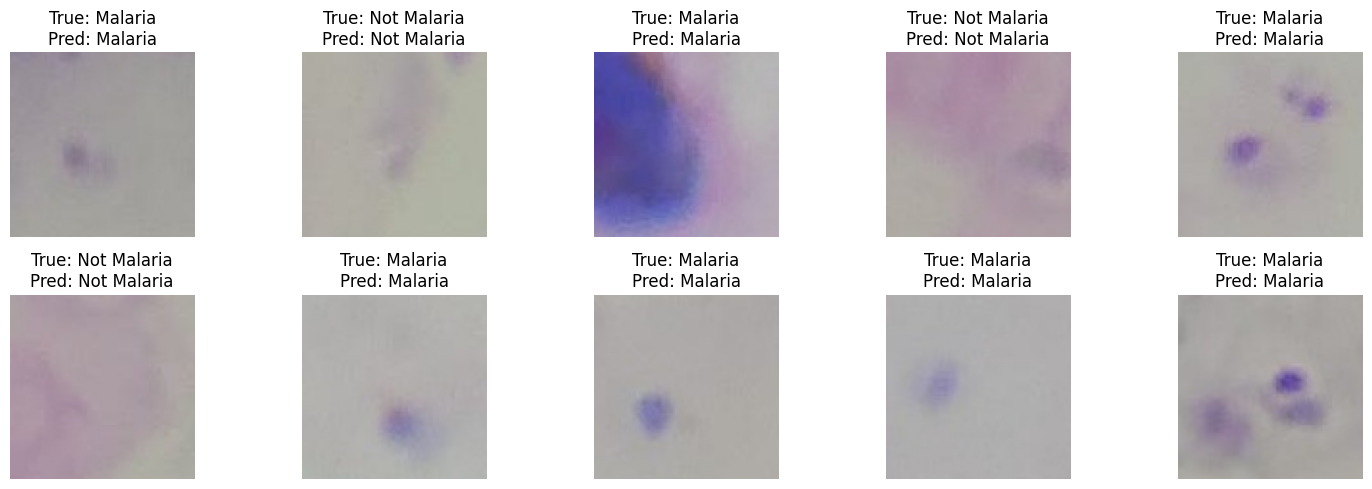

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def display_image_predictions(images, true_labels, predicted_labels, class_labels, num_images=10):
    # Select a random set of images from the dataset
    indices = np.random.choice(range(len(images)), num_images)

    plt.figure(figsize=(15, 5))
    for i, index in enumerate(indices):
        ax = plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(images[index])
        plt.axis('off')

        # If true_labels is one-hot encoded, convert to integers
        if true_labels.ndim > 1 and true_labels.shape[1] > 1:
            true_label_idx = true_labels[index].argmax()
        else:
            true_label_idx = int(true_labels[index])  # Make sure it is an integer

        predicted_label_idx = predicted_labels[index]

        # Set the title of the plot to the true label and predicted label
        ax.set_title(f"True: {class_labels[true_label_idx]}\nPred: {class_labels[predicted_label_idx]}")

    plt.tight_layout()  # Adjust the layout
    plt.show()

# Assuming Y_test is one-hot encoded and you've already obtained best_model_predictions
# and your class_labels are defined as before
display_image_predictions(X_test, Y_test, best_model_predictions, class_labels)

# Xception

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Resizing, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Nadam
import tensorflow as tf
import keras

IMG_SIZE = 96

def create_xception_model(optimizer, learning_rate):
    inputs = keras.Input(shape=(96, 96, 3))
    inputs_resized = Resizing(IMG_SIZE, IMG_SIZE)(inputs)
    baseModel = Xception(weights="imagenet", include_top=False, input_tensor=inputs_resized)
    headModel = GlobalAveragePooling2D()(baseModel.output)
    headModel = Dense(2, activation="sigmoid")(headModel)
    model = Model(inputs=inputs, outputs=headModel)

    for layer in baseModel.layers:
        layer.trainable = False

    opt = Nadam(learning_rate=learning_rate) if optimizer == 'NAdam' else SGD(learning_rate=learning_rate)
    model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
    return model



Training with optimizer=NAdam, learning_rate=0.0001
83683744/83683744 [==============================] - 0s 0us/step
Epoch 1/250
122/122 [==============================] - ETA: 0s - loss: 0.6723 - accuracy: 0.7275
Epoch 1: val_accuracy improved from -inf to 0.75955, saving model to best_model_Xception.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


122/122 [==============================] - 14s 55ms/step - loss: 0.6723 - accuracy: 0.7275 - val_loss: 0.6587 - val_accuracy: 0.7595
Epoch 2/250
121/122 [============================>.] - ETA: 0s - loss: 0.6455 - accuracy: 0.7885
Epoch 2: val_accuracy improved from 0.75955 to 0.81321, saving model to best_model_Xception.h5
122/122 [==============================] - 4s 36ms/step - loss: 0.6455 - accuracy: 0.7886 - val_loss: 0.6340 - val_accuracy: 0.8132
Epoch 3/250
121/122 [============================>.] - ETA: 0s - loss: 0.6225 - accuracy: 0.8182
Epoch 3: val_accuracy improved from 0.81321 to 0.82043, saving model to best_model_Xception.h5
122/122 [==============================] - 5s 40ms/step - loss: 0.6225 - accuracy: 0.8181 - val_loss: 0.6127 - val_accuracy: 0.8204
Epoch 4/250
120/122 [============================>.] - ETA: 0s - loss: 0.6023 - accuracy: 0.8268
Epoch 4: val_accuracy improved from 0.82043 to 0.82766, saving model to best_model_Xception.h5
122/122 [==================

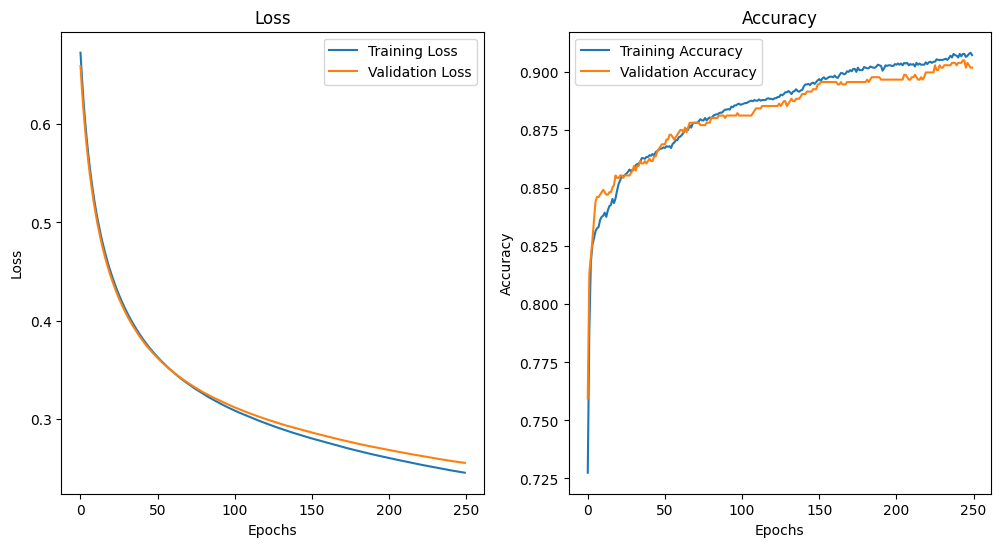


Training with optimizer=SGD, learning_rate=0.0001
Epoch 1/250
121/122 [============================>.] - ETA: 0s - loss: 0.6917 - accuracy: 0.5364
Epoch 1: val_accuracy improved from -inf to 0.51290, saving model to best_model_Xception.h5
122/122 [==============================] - 9s 55ms/step - loss: 0.6917 - accuracy: 0.5363 - val_loss: 0.6925 - val_accuracy: 0.5129
Epoch 2/250
121/122 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5393
Epoch 2: val_accuracy improved from 0.51290 to 0.51703, saving model to best_model_Xception.h5
122/122 [==============================] - 5s 39ms/step - loss: 0.6914 - accuracy: 0.5391 - val_loss: 0.6923 - val_accuracy: 0.5170
Epoch 3/250
121/122 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5439
Epoch 3: val_accuracy improved from 0.51703 to 0.52012, saving model to best_model_Xception.h5
122/122 [==============================] - 5s 40ms/step - loss: 0.6911 - accuracy: 0.5435 - val_loss: 0.6920 - v

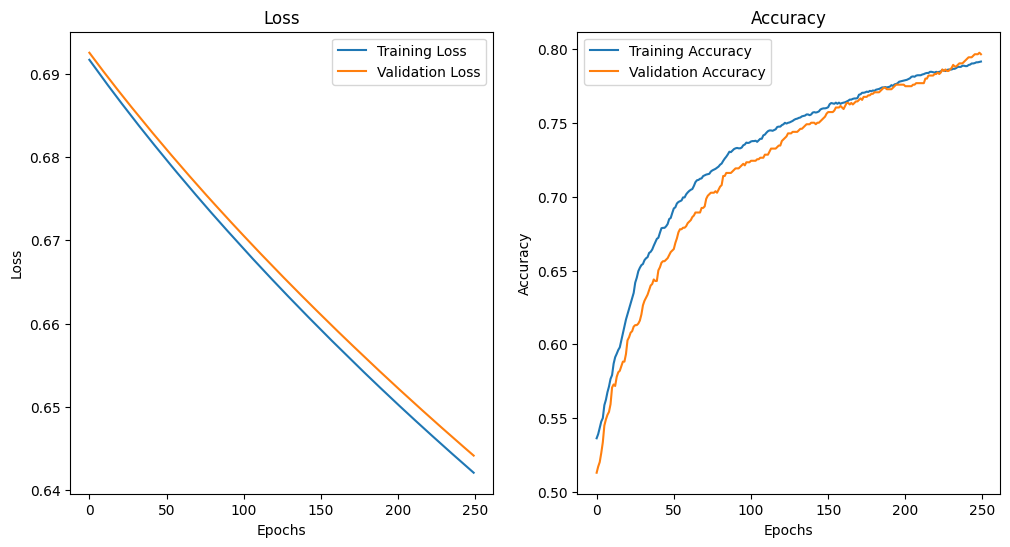


Training with optimizer=NAdam, learning_rate=0.001
Epoch 1/250
120/122 [============================>.] - ETA: 0s - loss: 0.5988 - accuracy: 0.7747
Epoch 1: val_accuracy improved from -inf to 0.81837, saving model to best_model_Xception.h5
122/122 [==============================] - 10s 52ms/step - loss: 0.5983 - accuracy: 0.7752 - val_loss: 0.5246 - val_accuracy: 0.8184
Epoch 2/250
121/122 [============================>.] - ETA: 0s - loss: 0.4893 - accuracy: 0.8376
Epoch 2: val_accuracy improved from 0.81837 to 0.85449, saving model to best_model_Xception.h5
122/122 [==============================] - 5s 41ms/step - loss: 0.4893 - accuracy: 0.8374 - val_loss: 0.4563 - val_accuracy: 0.8545
Epoch 3/250
121/122 [============================>.] - ETA: 0s - loss: 0.4374 - accuracy: 0.8525
Epoch 3: val_accuracy did not improve from 0.85449
122/122 [==============================] - 5s 40ms/step - loss: 0.4373 - accuracy: 0.8526 - val_loss: 0.4166 - val_accuracy: 0.8545
Epoch 4/250
121/122 [=

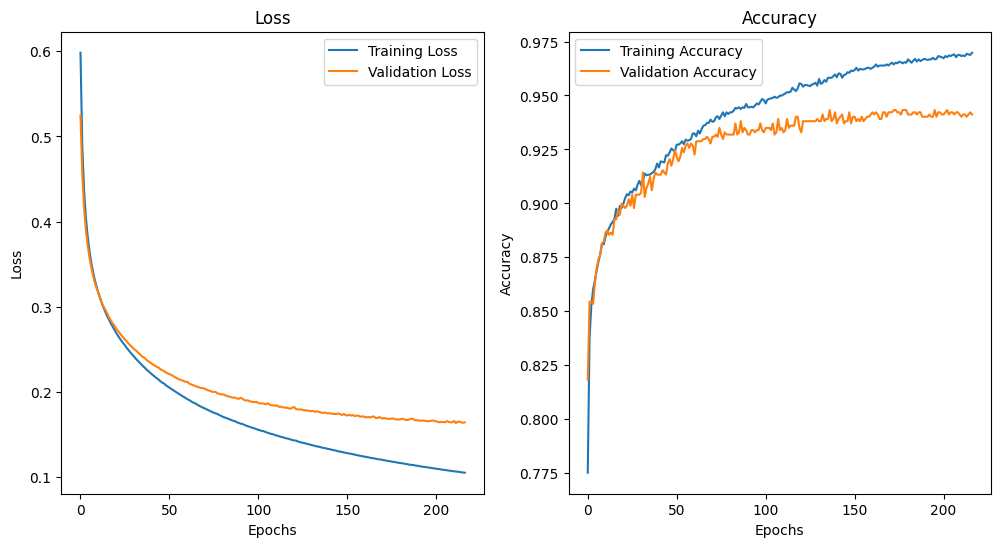


Training with optimizer=SGD, learning_rate=0.001
Epoch 1/250
121/122 [============================>.] - ETA: 0s - loss: 0.6943 - accuracy: 0.4935
Epoch 1: val_accuracy improved from -inf to 0.48916, saving model to best_model_Xception.h5
122/122 [==============================] - 10s 52ms/step - loss: 0.6943 - accuracy: 0.4939 - val_loss: 0.6938 - val_accuracy: 0.4892
Epoch 2/250
121/122 [============================>.] - ETA: 0s - loss: 0.6919 - accuracy: 0.5003
Epoch 2: val_accuracy improved from 0.48916 to 0.49432, saving model to best_model_Xception.h5
122/122 [==============================] - 5s 44ms/step - loss: 0.6919 - accuracy: 0.5001 - val_loss: 0.6915 - val_accuracy: 0.4943
Epoch 3/250
121/122 [============================>.] - ETA: 0s - loss: 0.6896 - accuracy: 0.5023
Epoch 3: val_accuracy improved from 0.49432 to 0.49845, saving model to best_model_Xception.h5
122/122 [==============================] - 5s 39ms/step - loss: 0.6896 - accuracy: 0.5025 - val_loss: 0.6892 - v

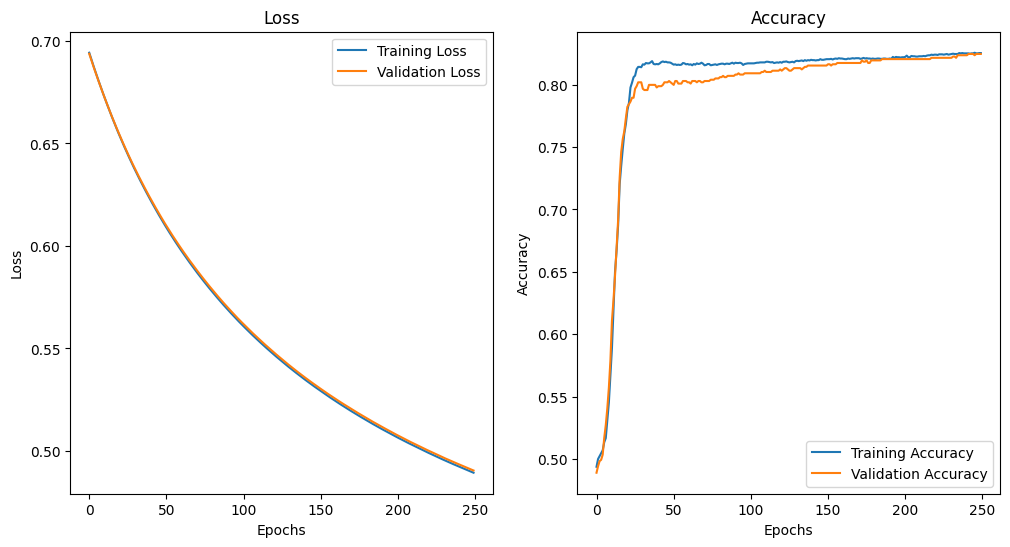

Best Model Parameters: {'optimizer': 'NAdam', 'learning_rate': 0.001}
Best Validation Accuracy: 0.9432404637336731
31/31 [==============================] - 2s 27ms/step


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

# Initialize the best model and its score
best_model = None
best_score = 0
best_params = {}

# Define the parameter grid
learning_rates = [1e-4, 1e-3]
optimizers = ['NAdam', 'SGD']

# Loop over the grid search parameters
for learning_rate in learning_rates:
    for optimizer_name in optimizers:
        print(f"\nTraining with optimizer={optimizer_name}, learning_rate={learning_rate}")
        model = create_xception_model(optimizer=optimizer_name, learning_rate=learning_rate)

        # Save the best model checkpoint
        filepath = "best_model_Xception.h5"
        checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

        # Early stopping to avoid overfitting
        early_stopping = EarlyStopping(monitor='val_loss', patience=5)

        # Fit the model
        history = model.fit(
            X_train, Y_train,
            validation_data=(X_test, Y_test),
            epochs=250,
            callbacks=[checkpoint, early_stopping],
            verbose=1
        )

        # Evaluate the model
        val_accuracy = max(history.history['val_accuracy'])
        print(f"Validation accuracy: {val_accuracy}")

        # If this model is the best so far, store its information
        if val_accuracy > best_score:
            best_score = val_accuracy
            best_model = model
            best_params = {'optimizer': optimizer_name, 'learning_rate': learning_rate}

        # Display the loss and accuracy plots
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.show()

# Summarize best results
print(f"Best Model Parameters: {best_params}")
print(f"Best Validation Accuracy: {best_score}")

# Save the best model
best_model.save(filepath)

# Predict with the best model
best_model_predictions = best_model.predict(X_test, batch_size=32)

# Ensure the predictions are in the correct shape
if best_model_predictions.shape[1] == 2:  # Check if the predictions are for both classes
    best_model_predictions = np.argmax(best_model_predictions, axis=1)  # Get the class with the highest probability
else:
    best_model_predictions = (best_model_predictions > 0.5).astype("int32").flatten()


              precision    recall  f1-score   support

           0       0.97      0.92      0.94       484
           1       0.92      0.97      0.94       485

    accuracy                           0.94       969
   macro avg       0.94      0.94      0.94       969
weighted avg       0.94      0.94      0.94       969



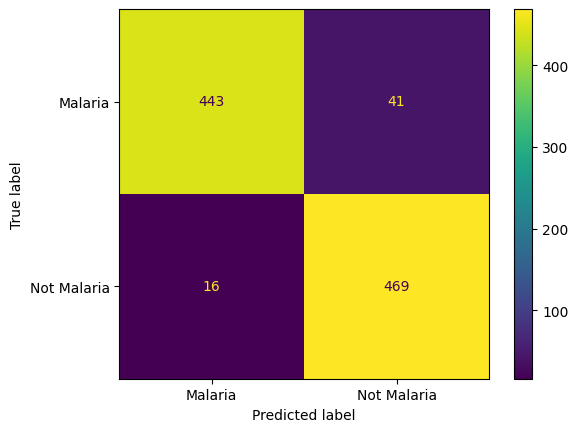

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

if Y_test.ndim > 1 and Y_test.shape[1] > 1:
    Y_test = Y_test.argmax(axis=1)

# Generate the classification report
print(classification_report(Y_test, best_model_predictions))

# Compute the confusion matrix
cm = confusion_matrix(Y_test, best_model_predictions)

# Plot the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels).plot()
plt.show()

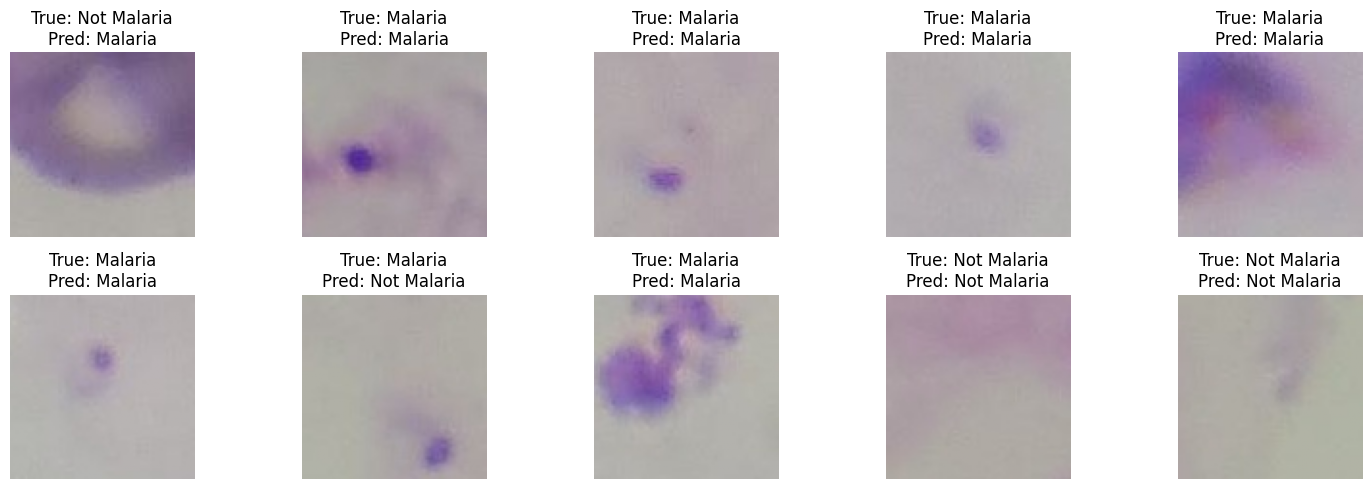

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def display_image_predictions(images, true_labels, predicted_labels, class_labels, num_images=10):
    # Select a random set of images from the dataset
    indices = np.random.choice(range(len(images)), num_images)

    plt.figure(figsize=(15, 5))
    for i, index in enumerate(indices):
        ax = plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(images[index])
        plt.axis('off')

        # If true_labels is one-hot encoded, convert to integers
        if true_labels.ndim > 1 and true_labels.shape[1] > 1:
            true_label_idx = true_labels[index].argmax()
        else:
            true_label_idx = int(true_labels[index])  # Make sure it is an integer

        predicted_label_idx = predicted_labels[index]

        # Set the title of the plot to the true label and predicted label
        ax.set_title(f"True: {class_labels[true_label_idx]}\nPred: {class_labels[predicted_label_idx]}")

    plt.tight_layout()  # Adjust the layout
    plt.show()

# Assuming Y_test is one-hot encoded and you've already obtained best_model_predictions
# and your class_labels are defined as before
display_image_predictions(X_test, Y_test, best_model_predictions, class_labels)

# Mobile VIT



Training with optimizer=NAdam, learning_rate=0.0001
Epoch 1/250
122/122 [==============================] - ETA: 0s - loss: 0.3602 - accuracy: 0.8707
Epoch 1: val_accuracy improved from -inf to 0.59030, saving model to best_model_mobilevit.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


122/122 [==============================] - 45s 193ms/step - loss: 0.3602 - accuracy: 0.8707 - val_loss: 0.6769 - val_accuracy: 0.5903
Epoch 2/250
121/122 [============================>.] - ETA: 0s - loss: 0.2681 - accuracy: 0.9008
Epoch 2: val_accuracy improved from 0.59030 to 0.78741, saving model to best_model_mobilevit.h5
122/122 [==============================] - 22s 177ms/step - loss: 0.2685 - accuracy: 0.9004 - val_loss: 0.5150 - val_accuracy: 0.7874
Epoch 3/250
121/122 [============================>.] - ETA: 0s - loss: 0.2380 - accuracy: 0.9078
Epoch 3: val_accuracy improved from 0.78741 to 0.86687, saving model to best_model_mobilevit.h5
122/122 [==============================] - 22s 177ms/step - loss: 0.2389 - accuracy: 0.9076 - val_loss: 0.3499 - val_accuracy: 0.8669
Epoch 4/250
121/122 [============================>.] - ETA: 0s - loss: 0.1985 - accuracy: 0.9225
Epoch 4: val_accuracy improved from 0.86687 to 0.91744, saving model to best_model_mobilevit.h5
122/122 [==========

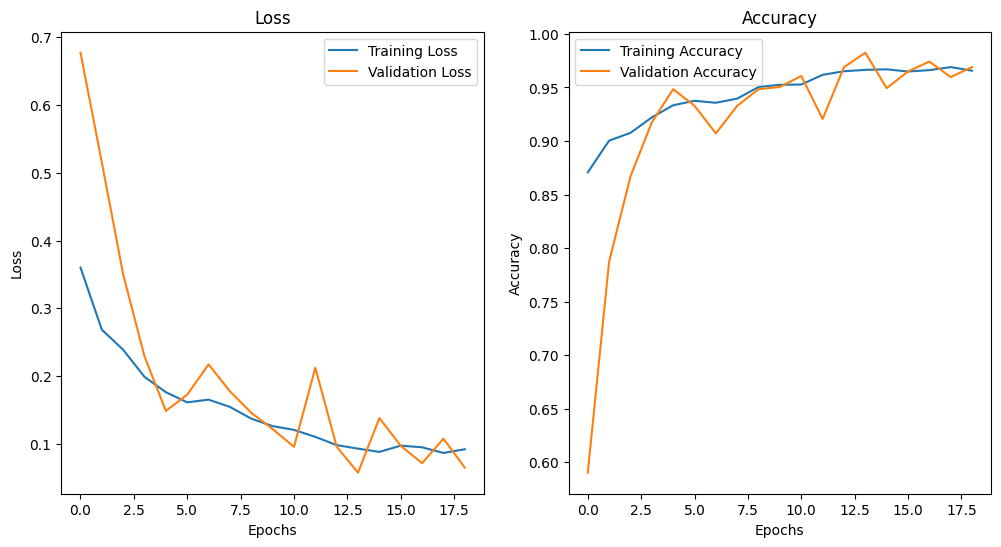


Training with optimizer=SGD, learning_rate=0.0001
Epoch 1/250
121/122 [============================>.] - ETA: 0s - loss: 0.6898 - accuracy: 0.5638
Epoch 1: val_accuracy improved from -inf to 0.49948, saving model to best_model_mobilevit.h5
122/122 [==============================] - 29s 195ms/step - loss: 0.6898 - accuracy: 0.5636 - val_loss: 0.7021 - val_accuracy: 0.4995
Epoch 2/250
121/122 [============================>.] - ETA: 0s - loss: 0.6617 - accuracy: 0.6748
Epoch 2: val_accuracy did not improve from 0.49948
122/122 [==============================] - 22s 184ms/step - loss: 0.6618 - accuracy: 0.6746 - val_loss: 0.7015 - val_accuracy: 0.4995
Epoch 3/250
121/122 [============================>.] - ETA: 0s - loss: 0.6458 - accuracy: 0.6960
Epoch 3: val_accuracy improved from 0.49948 to 0.60784, saving model to best_model_mobilevit.h5
122/122 [==============================] - 22s 177ms/step - loss: 0.6458 - accuracy: 0.6960 - val_loss: 0.6764 - val_accuracy: 0.6078
Epoch 4/250
121/

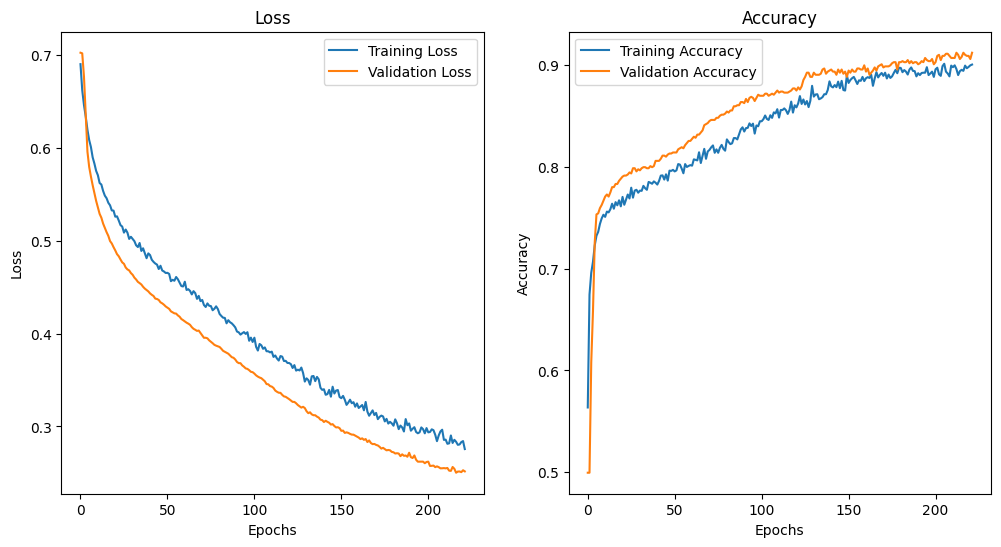


Training with optimizer=NAdam, learning_rate=0.001
Epoch 1/250
121/122 [============================>.] - ETA: 0s - loss: 0.4033 - accuracy: 0.8360
Epoch 1: val_accuracy improved from -inf to 0.70279, saving model to best_model_mobilevit.h5
122/122 [==============================] - 38s 195ms/step - loss: 0.4032 - accuracy: 0.8361 - val_loss: 0.6675 - val_accuracy: 0.7028
Epoch 2/250
122/122 [==============================] - ETA: 0s - loss: 0.3734 - accuracy: 0.8508
Epoch 2: val_accuracy did not improve from 0.70279
122/122 [==============================] - 24s 193ms/step - loss: 0.3734 - accuracy: 0.8508 - val_loss: 1.5080 - val_accuracy: 0.4788
Epoch 3/250
122/122 [==============================] - ETA: 0s - loss: 0.3629 - accuracy: 0.8581
Epoch 3: val_accuracy did not improve from 0.70279
122/122 [==============================] - 23s 191ms/step - loss: 0.3629 - accuracy: 0.8581 - val_loss: 0.9026 - val_accuracy: 0.3179
Epoch 4/250
121/122 [============================>.] - ETA: 

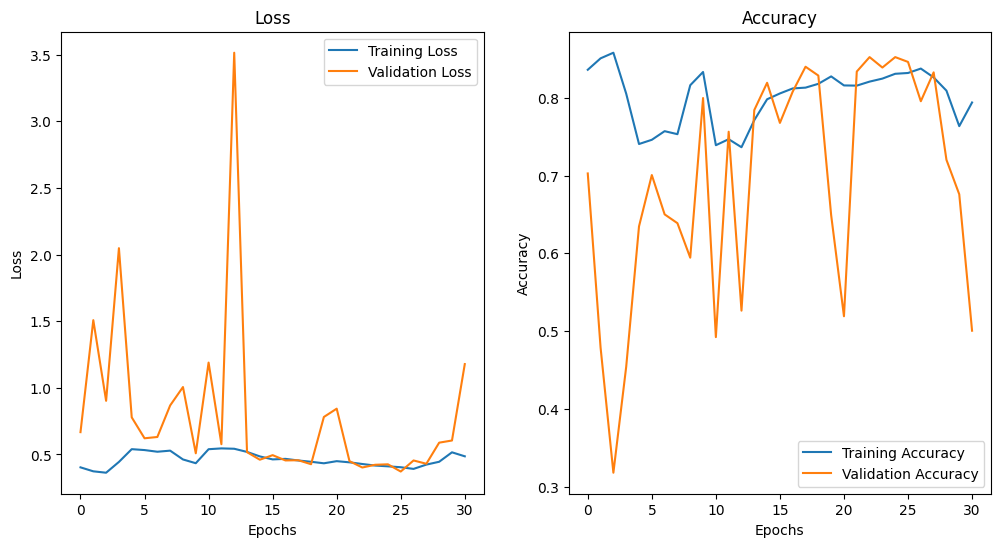


Training with optimizer=SGD, learning_rate=0.001
Epoch 1/250
121/122 [============================>.] - ETA: 0s - loss: 0.5949 - accuracy: 0.7402
Epoch 1: val_accuracy improved from -inf to 0.50052, saving model to best_model_mobilevit.h5
122/122 [==============================] - 29s 195ms/step - loss: 0.5949 - accuracy: 0.7399 - val_loss: 0.6968 - val_accuracy: 0.5005
Epoch 2/250
121/122 [============================>.] - ETA: 0s - loss: 0.5031 - accuracy: 0.8112
Epoch 2: val_accuracy improved from 0.50052 to 0.51703, saving model to best_model_mobilevit.h5
122/122 [==============================] - 23s 186ms/step - loss: 0.5033 - accuracy: 0.8111 - val_loss: 0.6865 - val_accuracy: 0.5170
Epoch 3/250
121/122 [============================>.] - ETA: 0s - loss: 0.4665 - accuracy: 0.8171
Epoch 3: val_accuracy improved from 0.51703 to 0.66047, saving model to best_model_mobilevit.h5
122/122 [==============================] - 22s 177ms/step - loss: 0.4668 - accuracy: 0.8170 - val_loss: 0.

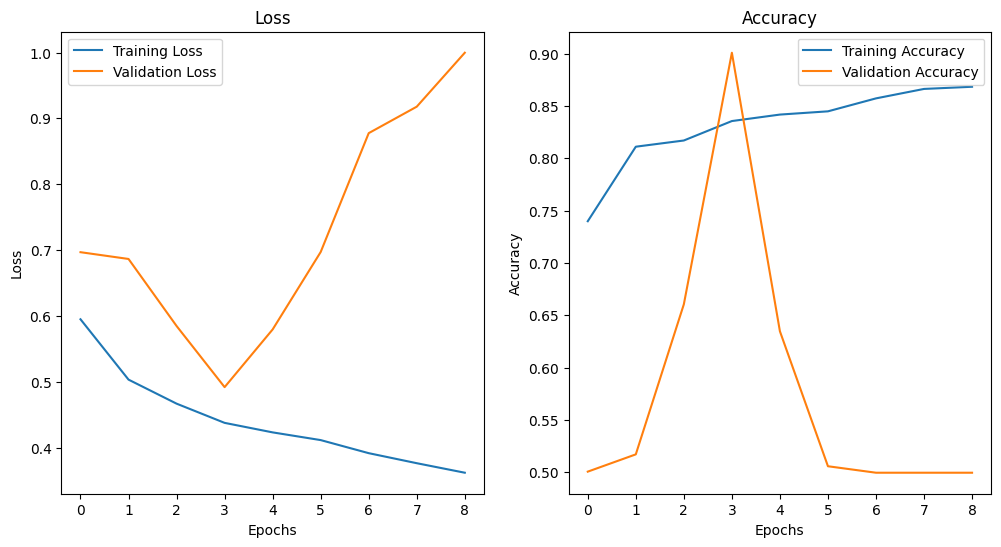

Best Model Parameters: {'optimizer': 'NAdam', 'learning_rate': 0.0001}
Best Validation Accuracy: 0.9824561476707458
31/31 [==============================] - 2s 56ms/step


NameError: name 'classification_report' is not defined

In [ ]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import tensorflow as tf
from tensorflow.keras import layers as L

def inverted_residual_block(inputs, num_filters, strides=1, expansion_ratio=1):
    x = L.Conv2D(expansion_ratio * inputs.shape[-1], 1, padding="same", use_bias=False)(inputs)
    x = L.BatchNormalization()(x)
    x = L.Activation("swish")(x)

    x = L.DepthwiseConv2D(3, strides=strides, padding="same", use_bias=False)(x)
    x = L.BatchNormalization()(x)
    x = L.Activation("swish")(x)

    x = L.Conv2D(num_filters, 1, padding="same", use_bias=False)(x)
    x = L.BatchNormalization()(x)

    if strides == 1 and inputs.shape[-1] == num_filters:
        x = L.Add()([inputs, x])
    return x

def transformer_encoder(x, num_heads, dim, mlp_dim):
    # Layer normalization before the multi-head attention
    x = L.LayerNormalization()(x)

    # Multi-head attention
    attn_output = L.MultiHeadAttention(num_heads=num_heads, key_dim=dim)(x, x)

    # Skip connection after attention
    x = L.Add()([x, attn_output])

    # Second layer normalization
    x = L.LayerNormalization()(x)

    # MLP block
    x_ffn = L.Dense(mlp_dim, activation="swish")(x)
    x_ffn = L.Dropout(0.1)(x_ffn)
    x_ffn = L.Dense(dim)(x_ffn)
    x_ffn = L.Dropout(0.1)(x_ffn)

    # Skip connection after MLP
    x = L.Add()([x, x_ffn])

    return x

def mobile_vit_block(inputs, num_filters, dim, patch_size=2, num_layers=1):
    B, H, W, C = inputs.shape
    x = L.Conv2D(dim, 1, padding="same", use_bias=False)(inputs)
    x = L.BatchNormalization()(x)
    x = L.Activation("swish")(x)

    # Calculate the number of patches and dimensions for each patch
    num_patches = (H // patch_size) * (W // patch_size)
    patch_dim = patch_size * patch_size * dim

    # Reshape to (num_patches, patch_dim)
    x = L.Reshape((num_patches, patch_dim))(x)

    # Process through the transformer encoder
    for _ in range(num_layers):
        x = transformer_encoder(x, num_heads=1, dim=patch_dim, mlp_dim=patch_dim*2)

    # Reshape back to the spatial dimensions
    x = L.Reshape((H, W, dim))(x)

    # Final convolution to match the desired number of filters
    x = L.Conv2D(num_filters, 3, padding="same", use_bias=False)(x)
    x = L.BatchNormalization()(x)
    x = L.Activation("swish")(x)

    return x


def MobileViT(input_shape, num_classes):
    inputs = L.Input(shape=input_shape)
    x = inverted_residual_block(inputs, 16, strides=2, expansion_ratio=1)
    x = mobile_vit_block(x, 32, dim=96, patch_size=2, num_layers=2)
    x = inverted_residual_block(x, 48, strides=1, expansion_ratio=1)
    x = L.GlobalAveragePooling2D()(x)
    outputs = L.Dense(num_classes, activation="softmax")(x)
    return tf.keras.Model(inputs, outputs)

def prepare_data():
    (X_train, X_test, Y_train, Y_test) = train_test_split(Data, Labels, train_size=0.8, stratify = Labels, random_state =42)
    # Convert one-hot encoded labels to integer indices if necessary
    if Labels.ndim == 1 and Labels.shape[1] > 1:
        Y_train = np.argmax(Y_train, axis=1)
        Y_test = np.argmax(Y_test, axis=1)
    return X_train, Y_train, X_test, Y_test

def create_model(optimizer, learning_rate):
    model = MobileViT((96, 96, 3), 2)
    opt = tf.keras.optimizers.Nadam(learning_rate=learning_rate) if optimizer == 'NAdam' else tf.keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

def train_and_evaluate_model(X_train, Y_train, X_test, Y_test, learning_rate, optimizer_name):
    print(f"\nTraining with optimizer={optimizer_name}, learning_rate={learning_rate}")
    model = create_model(optimizer_name, learning_rate)
    filepath = "best_model_mobilevit.h5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)
    history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs= 250, batch_size=32, callbacks=[checkpoint, early_stopping], verbose=1)
    return model, history

def plot_metrics(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

def main():
    X_train, Y_train, X_test, Y_test = prepare_data()
    best_model = None
    best_model = None
    best_score = 0
    best_params = {}
    learning_rates = [1e-4, 1e-3]
    optimizers = ['NAdam', 'SGD']

    for learning_rate in learning_rates:
        for optimizer_name in optimizers:
            model, history = train_and_evaluate_model(X_train, Y_train, X_test, Y_test, learning_rate, optimizer_name)
            val_accuracy = max(history.history['val_accuracy'])
            print(f"Validation accuracy: {val_accuracy}")
            if val_accuracy > best_score:
                best_score = val_accuracy
                best_model = model
                best_params = {'optimizer': optimizer_name, 'learning_rate': learning_rate}
            plot_metrics(history)

    print(f"Best Model Parameters: {best_params}")
    print(f"Best Validation Accuracy: {best_score}")
    best_model.save("best_model_mobilevit.h5")
    best_model_predictions = best_model.predict(X_test, batch_size=32)
    best_model_predictions = np.argmax(best_model_predictions, axis=1)
    print(classification_report(Y_test, best_model_predictions))
    cm = confusion_matrix(Y_test, best_model_predictions)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()
    plt.show()

if __name__ == "__main__":
    main()


31/31 [==============================] - 2s 54ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       484
           1       0.97      0.96      0.97       485

    accuracy                           0.97       969
   macro avg       0.97      0.97      0.97       969
weighted avg       0.97      0.97      0.97       969



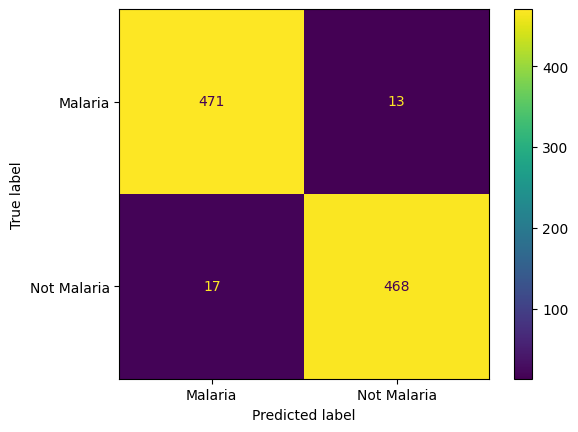

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Load the best saved model
best_model = load_model('/content/best_model_mobilevit.h5')

# Predict with the best model
best_model_predictions = best_model.predict(X_test, batch_size=32)

# Ensure the predictions are in the correct shape
if best_model_predictions.shape[1] == 2:  # Check if the predictions are for both classes
    best_model_predictions = np.argmax(best_model_predictions, axis=1)  # Get the class with the highest probability
else:
    best_model_predictions = (best_model_predictions > 0.5).astype("int32").flatten()

# Ensure Y_test is in the correct shape
if Y_test.ndim > 1 and Y_test.shape[1] > 1:
    Y_test = Y_test.argmax(axis=1)  # Convert one-hot encoded labels to class labels

# Generate the classification report
print(classification_report(Y_test, best_model_predictions))

# Compute the confusion matrix
cm = confusion_matrix(Y_test, best_model_predictions)

# Plot the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels).plot()
plt.show()


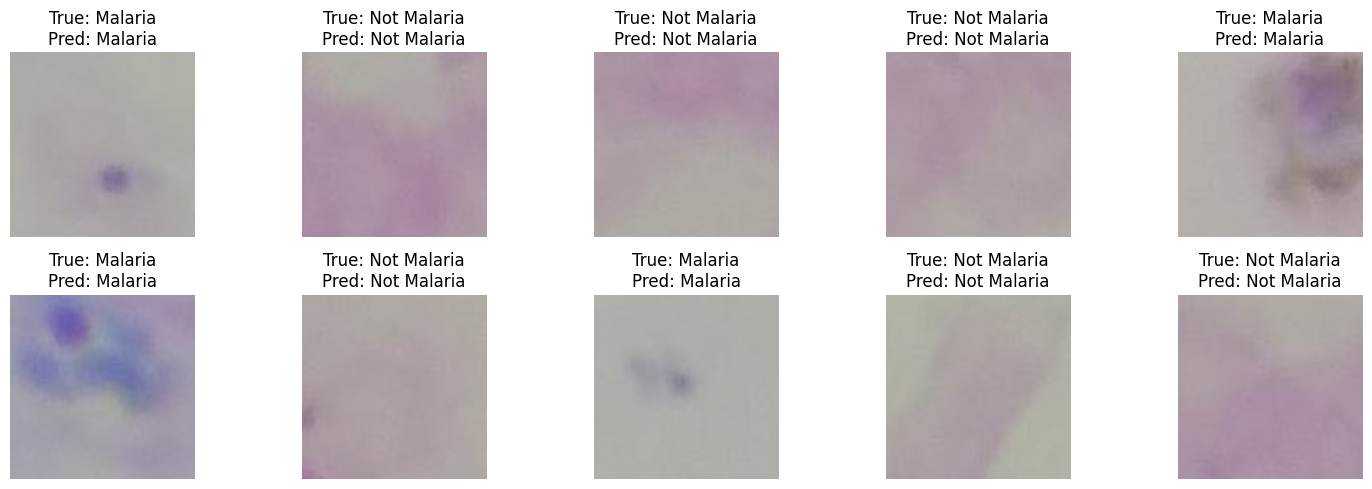

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def display_image_predictions(images, true_labels, predicted_labels, class_labels, num_images=10):
    # Select a random set of images from the dataset
    indices = np.random.choice(range(len(images)), num_images)

    plt.figure(figsize=(15, 5))
    for i, index in enumerate(indices):
        ax = plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(images[index])
        plt.axis('off')

        # If true_labels is one-hot encoded, convert to integers
        if true_labels.ndim > 1 and true_labels.shape[1] > 1:
            true_label_idx = true_labels[index].argmax()
        else:
            true_label_idx = int(true_labels[index])  # Make sure it is an integer

        predicted_label_idx = predicted_labels[index]

        # Set the title of the plot to the true label and predicted label
        ax.set_title(f"True: {class_labels[true_label_idx]}\nPred: {class_labels[predicted_label_idx]}")

    plt.tight_layout()  # Adjust the layout
    plt.show()

# Assuming Y_test is one-hot encoded and you've already obtained best_model_predictions
# and your class_labels are defined as before
display_image_predictions(X_test, Y_test, best_model_predictions, class_labels)

# Nasnet Mobile

In [ ]:
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.layers import Resizing, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Nadam
import tensorflow as tf
import keras

IMG_SIZE = 96

def create_nasnet_model(optimizer, learning_rate):
    inputs = keras.Input(shape=(96, 96, 3))
    inputs_resized = Resizing(IMG_SIZE, IMG_SIZE)(inputs)
    baseModel = NASNetMobile(weights="imagenet", include_top=False, input_tensor=inputs_resized)
    headModel = GlobalAveragePooling2D()(baseModel.output)
    headModel = Dense(2, activation="sigmoid")(headModel)
    model = Model(inputs=inputs, outputs=headModel)

    for layer in baseModel.layers:
        layer.trainable = False

    opt = Nadam(learning_rate=learning_rate) if optimizer == 'NAdam' else SGD(learning_rate=learning_rate)
    model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
    return model


Training with optimizer=NAdam, learning_rate=0.0001
19993432/19993432 [==============================] - 2s 0us/step
Epoch 1/250
122/122 [==============================] - ETA: 0s - loss: 0.6833 - accuracy: 0.6186
Epoch 1: val_accuracy improved from -inf to 0.72446, saving model to best_model_NASNetMobile.h5
122/122 [==============================] - 52s 97ms/step - loss: 0.6833 - accuracy: 0.6186 - val_loss: 0.6503 - val_accuracy: 0.7245
Epoch 2/250
121/122 [============================>.] - ETA: 0s - loss: 0.6348 - accuracy: 0.7472
Epoch 2: val_accuracy improved from 0.72446 to 0.78741, saving model to best_model_NASNetMobile.h5
122/122 [==============================] - 6s 47ms/step - loss: 0.6349 - accuracy: 0.7468 - val_loss: 0.6097 - val_accuracy: 0.7874
Epoch 3/250
120/122 [============================>.] - ETA: 0s - loss: 0.6008 - accuracy: 0.8091
Epoch 3: val_accuracy improved from 0.78741 to 0.82456, saving model to best_model_NASNetMobile.h5
122/122 [=======================

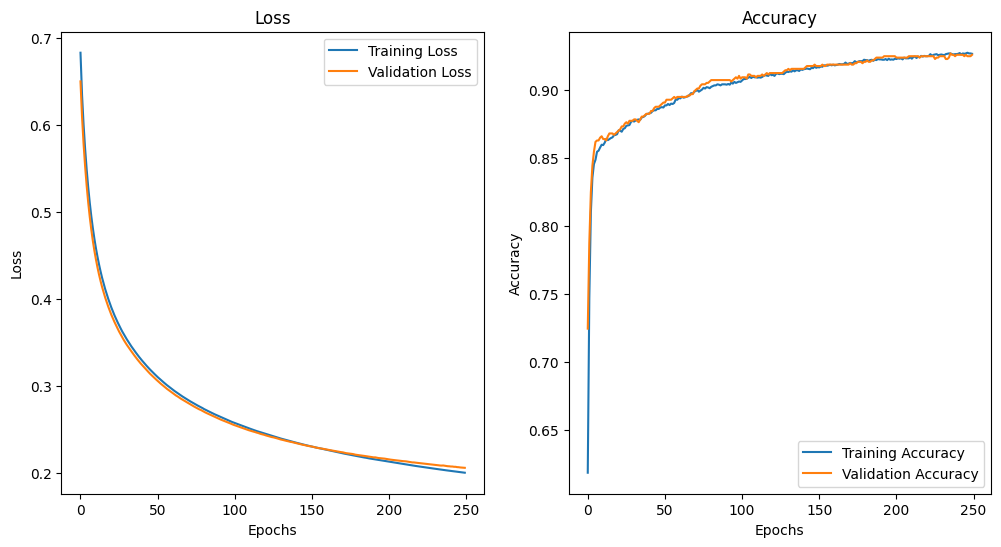


Training with optimizer=SGD, learning_rate=0.0001
Epoch 1/250
121/122 [============================>.] - ETA: 0s - loss: 0.6884 - accuracy: 0.5152
Epoch 1: val_accuracy improved from -inf to 0.52012, saving model to best_model_NASNetMobile.h5
122/122 [==============================] - 25s 83ms/step - loss: 0.6884 - accuracy: 0.5154 - val_loss: 0.6885 - val_accuracy: 0.5201
Epoch 2/250
121/122 [============================>.] - ETA: 0s - loss: 0.6861 - accuracy: 0.5235
Epoch 2: val_accuracy improved from 0.52012 to 0.52735, saving model to best_model_NASNetMobile.h5
122/122 [==============================] - 7s 55ms/step - loss: 0.6861 - accuracy: 0.5236 - val_loss: 0.6861 - val_accuracy: 0.5273
Epoch 3/250
120/122 [============================>.] - ETA: 0s - loss: 0.6837 - accuracy: 0.5362
Epoch 3: val_accuracy improved from 0.52735 to 0.53664, saving model to best_model_NASNetMobile.h5
122/122 [==============================] - 6s 47ms/step - loss: 0.6838 - accuracy: 0.5365 - val_los

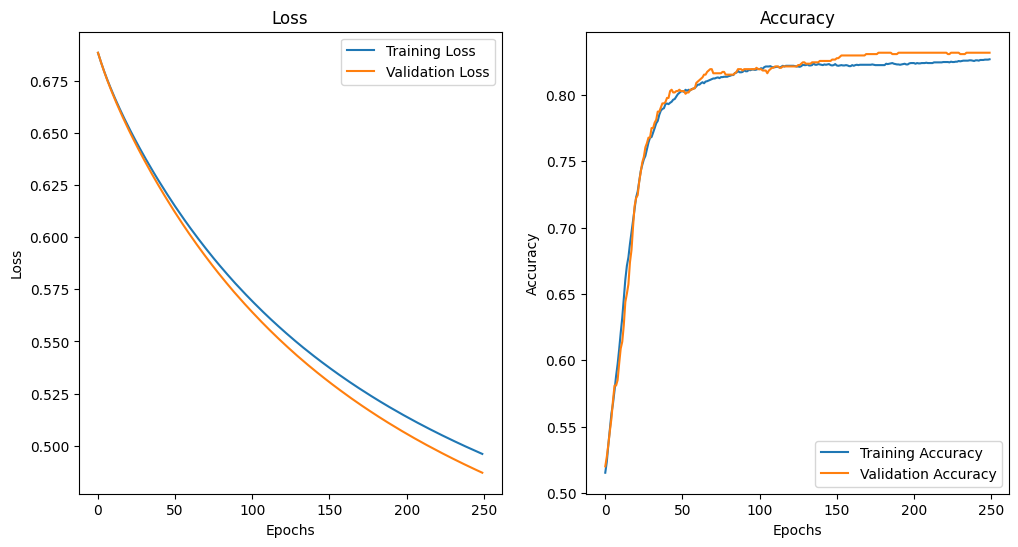


Training with optimizer=NAdam, learning_rate=0.001
Epoch 1/250
121/122 [============================>.] - ETA: 0s - loss: 0.5531 - accuracy: 0.7787
Epoch 1: val_accuracy improved from -inf to 0.85655, saving model to best_model_NASNetMobile.h5
122/122 [==============================] - 25s 86ms/step - loss: 0.5532 - accuracy: 0.7788 - val_loss: 0.4587 - val_accuracy: 0.8566
Epoch 2/250
121/122 [============================>.] - ETA: 0s - loss: 0.4275 - accuracy: 0.8618
Epoch 2: val_accuracy improved from 0.85655 to 0.86687, saving model to best_model_NASNetMobile.h5
122/122 [==============================] - 7s 54ms/step - loss: 0.4276 - accuracy: 0.8619 - val_loss: 0.3933 - val_accuracy: 0.8669
Epoch 3/250
121/122 [============================>.] - ETA: 0s - loss: 0.3802 - accuracy: 0.8675
Epoch 3: val_accuracy improved from 0.86687 to 0.87410, saving model to best_model_NASNetMobile.h5
122/122 [==============================] - 5s 42ms/step - loss: 0.3803 - accuracy: 0.8674 - val_lo

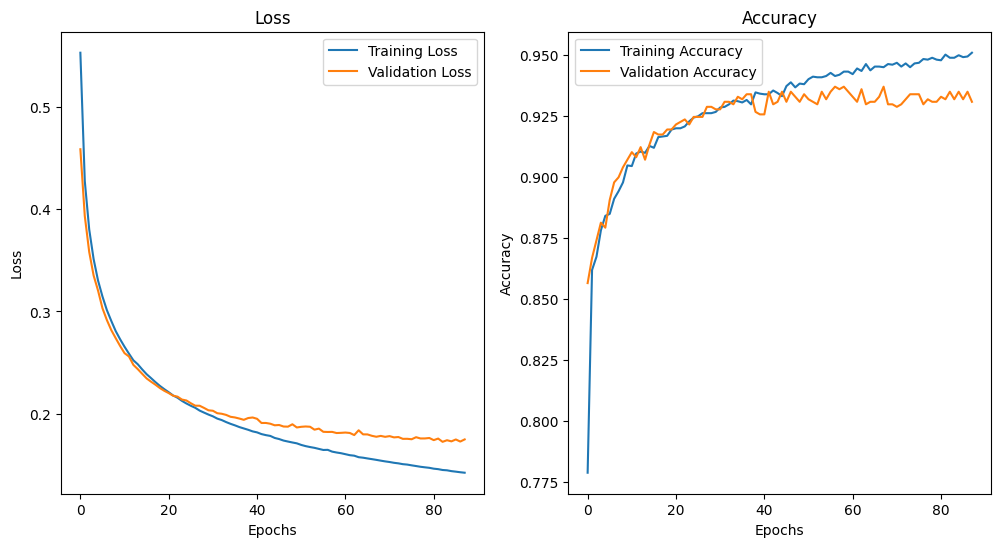


Training with optimizer=SGD, learning_rate=0.001
Epoch 1/250
122/122 [==============================] - ETA: 0s - loss: 0.7289 - accuracy: 0.4725
Epoch 1: val_accuracy improved from -inf to 0.48813, saving model to best_model_NASNetMobile.h5
122/122 [==============================] - 25s 93ms/step - loss: 0.7289 - accuracy: 0.4725 - val_loss: 0.7094 - val_accuracy: 0.4881
Epoch 2/250
122/122 [==============================] - ETA: 0s - loss: 0.6971 - accuracy: 0.5190
Epoch 2: val_accuracy improved from 0.48813 to 0.58308, saving model to best_model_NASNetMobile.h5
122/122 [==============================] - 5s 43ms/step - loss: 0.6971 - accuracy: 0.5190 - val_loss: 0.6848 - val_accuracy: 0.5831
Epoch 3/250
121/122 [============================>.] - ETA: 0s - loss: 0.6767 - accuracy: 0.6188
Epoch 3: val_accuracy improved from 0.58308 to 0.66047, saving model to best_model_NASNetMobile.h5
122/122 [==============================] - 7s 59ms/step - loss: 0.6767 - accuracy: 0.6186 - val_loss

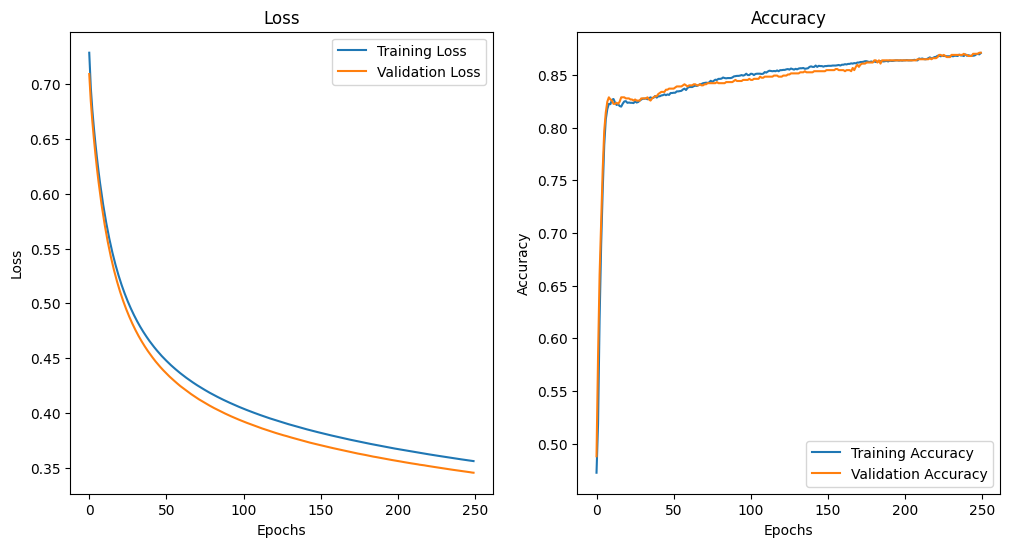

Best Model Parameters: {'optimizer': 'NAdam', 'learning_rate': 0.001}
Best Validation Accuracy: 0.9370484948158264
31/31 [==============================] - 5s 27ms/step


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

# Initialize the best model and its score
best_model = None
best_score = 0
best_params = {}

# Define the parameter grid
learning_rates = [1e-4, 1e-3]
optimizers = ['NAdam', 'SGD']

# Loop over the grid search parameters
for learning_rate in learning_rates:
    for optimizer_name in optimizers:
        print(f"\nTraining with optimizer={optimizer_name}, learning_rate={learning_rate}")
        model = create_nasnet_model(optimizer=optimizer_name, learning_rate=learning_rate)

        # Save the best model checkpoint
        filepath = "best_model_NASNetMobile.h5"
        checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

        # Early stopping to avoid overfitting
        early_stopping = EarlyStopping(monitor='val_loss', patience=5)

        # Fit the model
        history = model.fit(
            X_train, Y_train,
            validation_data=(X_test, Y_test),
            epochs=250,
            callbacks=[checkpoint, early_stopping],
            verbose=1
        )

        # Evaluate the model
        val_accuracy = max(history.history['val_accuracy'])
        print(f"Validation accuracy: {val_accuracy}")

        # If this model is the best so far, store its information
        if val_accuracy > best_score:
            best_score = val_accuracy
            best_model = model
            best_params = {'optimizer': optimizer_name, 'learning_rate': learning_rate}

        # Display the loss and accuracy plots
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.show()

# Summarize best results
print(f"Best Model Parameters: {best_params}")
print(f"Best Validation Accuracy: {best_score}")

# Save the best model
best_model.save(filepath)

# Predict with the best model
best_model_predictions = best_model.predict(X_test, batch_size=32)

# Ensure the predictions are in the correct shape
if best_model_predictions.shape[1] == 2:  # Check if the predictions are for both classes
    best_model_predictions = np.argmax(best_model_predictions, axis=1)  # Get the class with the highest probability
else:
    best_model_predictions = (best_model_predictions > 0.5).astype("int32").flatten()


              precision    recall  f1-score   support

           0       0.96      0.90      0.93       484
           1       0.91      0.96      0.93       485

    accuracy                           0.93       969
   macro avg       0.93      0.93      0.93       969
weighted avg       0.93      0.93      0.93       969



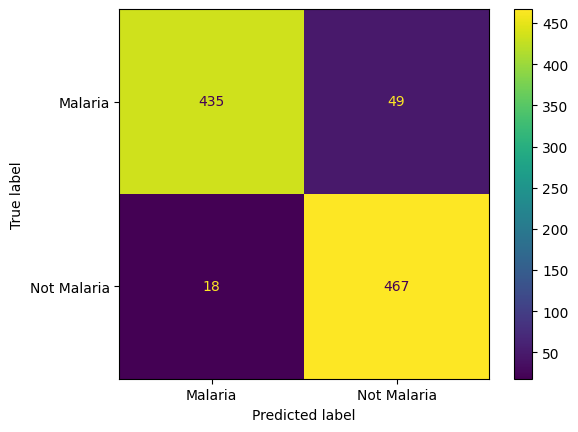

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

if Y_test.ndim > 1 and Y_test.shape[1] > 1:
    Y_test = Y_test.argmax(axis=1)

# Generate the classification report
print(classification_report(Y_test, best_model_predictions))

# Compute the confusion matrix
cm = confusion_matrix(Y_test, best_model_predictions)

# Plot the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels).plot()
plt.show()

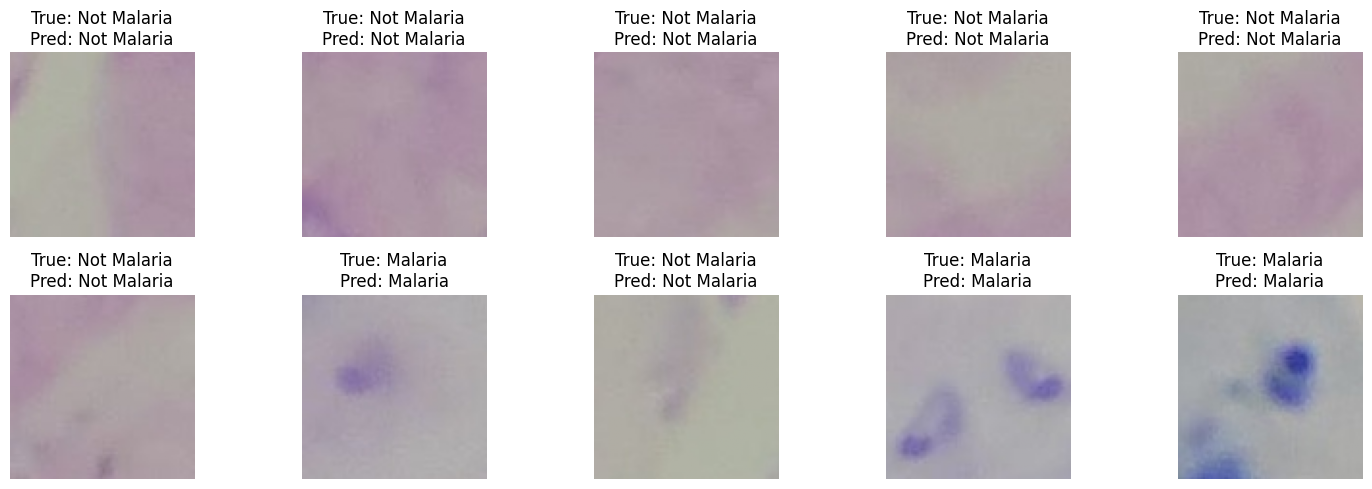

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def display_image_predictions(images, true_labels, predicted_labels, class_labels, num_images=10):
    # Select a random set of images from the dataset
    indices = np.random.choice(range(len(images)), num_images)

    plt.figure(figsize=(15, 5))
    for i, index in enumerate(indices):
        ax = plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(images[index])
        plt.axis('off')

        # If true_labels is one-hot encoded, convert to integers
        if true_labels.ndim > 1 and true_labels.shape[1] > 1:
            true_label_idx = true_labels[index].argmax()
        else:
            true_label_idx = int(true_labels[index])  # Make sure it is an integer

        predicted_label_idx = predicted_labels[index]

        # Set the title of the plot to the true label and predicted label
        ax.set_title(f"True: {class_labels[true_label_idx]}\nPred: {class_labels[predicted_label_idx]}")

    plt.tight_layout()  # Adjust the layout
    plt.show()

# Assuming Y_test is one-hot encoded and you've already obtained best_model_predictions
# and your class_labels are defined as before
display_image_predictions(X_test, Y_test, best_model_predictions, class_labels)

# VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Resizing, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Nadam
import tensorflow as tf
import keras

def create_vgg16_model(optimizer, learning_rate):
    inputs = keras.Input(shape=(96, 96, 3))
    inputs_resized = Resizing(96, 96)(inputs)
    baseModel = VGG16(weights="imagenet", include_top=False, input_tensor=inputs_resized)
    headModel = GlobalAveragePooling2D()(baseModel.output)
    headModel = Dense(2, activation="sigmoid")(headModel)
    model = Model(inputs=inputs, outputs=headModel)

    for layer in baseModel.layers:
        layer.trainable = False

    opt = Nadam(learning_rate=learning_rate) if optimizer == 'NAdam' else SGD(learning_rate=learning_rate)
    model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
    return model



Training with optimizer=NAdam, learning_rate=0.0001
58889256/58889256 [==============================] - 4s 0us/step
Epoch 1/250
122/122 [==============================] - ETA: 0s - loss: 0.6941 - accuracy: 0.4978
Epoch 1: val_accuracy improved from -inf to 0.50774, saving model to best_model_VGG16.h5
122/122 [==============================] - 15s 63ms/step - loss: 0.6941 - accuracy: 0.4978 - val_loss: 0.6886 - val_accuracy: 0.5077
Epoch 2/250
  1/122 [..............................] - ETA: 3s - loss: 0.6884 - accuracy: 0.5938

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


121/122 [============================>.] - ETA: 0s - loss: 0.6862 - accuracy: 0.6235
Epoch 2: val_accuracy improved from 0.50774 to 0.57379, saving model to best_model_VGG16.h5
122/122 [==============================] - 4s 37ms/step - loss: 0.6862 - accuracy: 0.6232 - val_loss: 0.6832 - val_accuracy: 0.5738
Epoch 3/250
121/122 [============================>.] - ETA: 0s - loss: 0.6808 - accuracy: 0.6552
Epoch 3: val_accuracy improved from 0.57379 to 0.72549, saving model to best_model_VGG16.h5
122/122 [==============================] - 5s 40ms/step - loss: 0.6808 - accuracy: 0.6555 - val_loss: 0.6779 - val_accuracy: 0.7255
Epoch 4/250
121/122 [============================>.] - ETA: 0s - loss: 0.6755 - accuracy: 0.7064
Epoch 4: val_accuracy did not improve from 0.72549
122/122 [==============================] - 4s 34ms/step - loss: 0.6755 - accuracy: 0.7063 - val_loss: 0.6729 - val_accuracy: 0.6842
Epoch 5/250
121/122 [============================>.] - ETA: 0s - loss: 0.6704 - accuracy: 

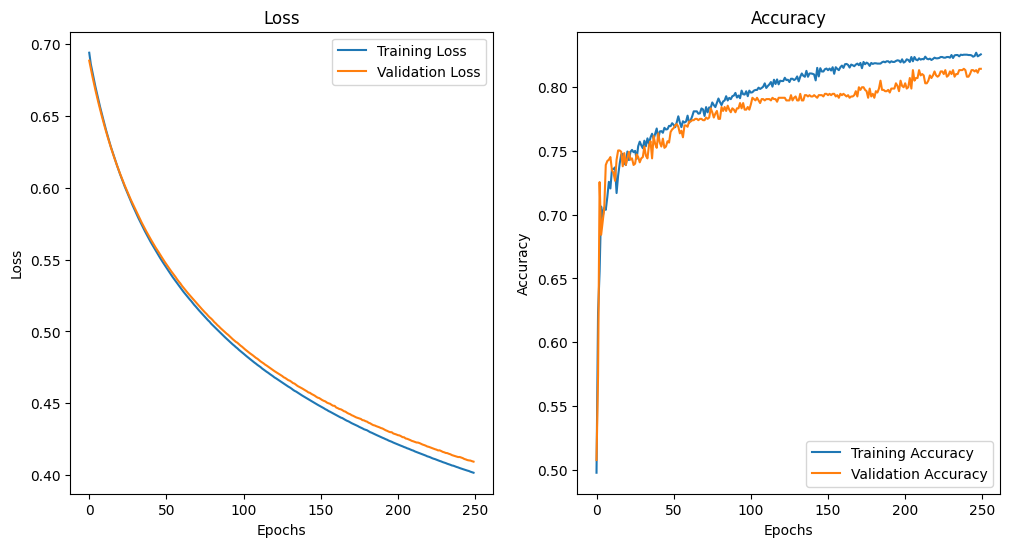


Training with optimizer=SGD, learning_rate=0.0001
Epoch 1/250
121/122 [============================>.] - ETA: 0s - loss: 0.7154 - accuracy: 0.5005
Epoch 1: val_accuracy improved from -inf to 0.49948, saving model to best_model_VGG16.h5
122/122 [==============================] - 6s 43ms/step - loss: 0.7155 - accuracy: 0.5001 - val_loss: 0.7105 - val_accuracy: 0.4995
Epoch 2/250
121/122 [============================>.] - ETA: 0s - loss: 0.7082 - accuracy: 0.5000
Epoch 2: val_accuracy did not improve from 0.49948
122/122 [==============================] - 4s 36ms/step - loss: 0.7081 - accuracy: 0.5001 - val_loss: 0.7046 - val_accuracy: 0.4995
Epoch 3/250
121/122 [============================>.] - ETA: 0s - loss: 0.7033 - accuracy: 0.5003
Epoch 3: val_accuracy did not improve from 0.49948
122/122 [==============================] - 5s 39ms/step - loss: 0.7033 - accuracy: 0.5001 - val_loss: 0.7006 - val_accuracy: 0.4995
Epoch 4/250
121/122 [============================>.] - ETA: 0s - loss: 

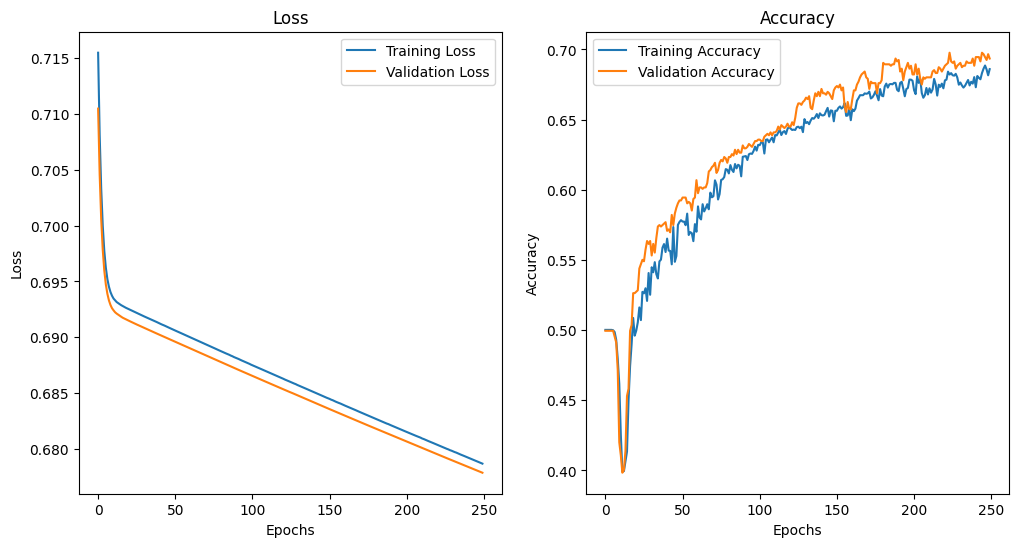


Training with optimizer=NAdam, learning_rate=0.001
Epoch 1/250
121/122 [============================>.] - ETA: 0s - loss: 0.6682 - accuracy: 0.6446
Epoch 1: val_accuracy improved from -inf to 0.72755, saving model to best_model_VGG16.h5
122/122 [==============================] - 6s 45ms/step - loss: 0.6681 - accuracy: 0.6449 - val_loss: 0.6435 - val_accuracy: 0.7276
Epoch 2/250
121/122 [============================>.] - ETA: 0s - loss: 0.6269 - accuracy: 0.7394
Epoch 2: val_accuracy improved from 0.72755 to 0.77812, saving model to best_model_VGG16.h5
122/122 [==============================] - 5s 38ms/step - loss: 0.6269 - accuracy: 0.7396 - val_loss: 0.6111 - val_accuracy: 0.7781
Epoch 3/250
121/122 [============================>.] - ETA: 0s - loss: 0.5971 - accuracy: 0.7585
Epoch 3: val_accuracy did not improve from 0.77812
122/122 [==============================] - 5s 40ms/step - loss: 0.5970 - accuracy: 0.7587 - val_loss: 0.5870 - val_accuracy: 0.7327
Epoch 4/250
121/122 [========

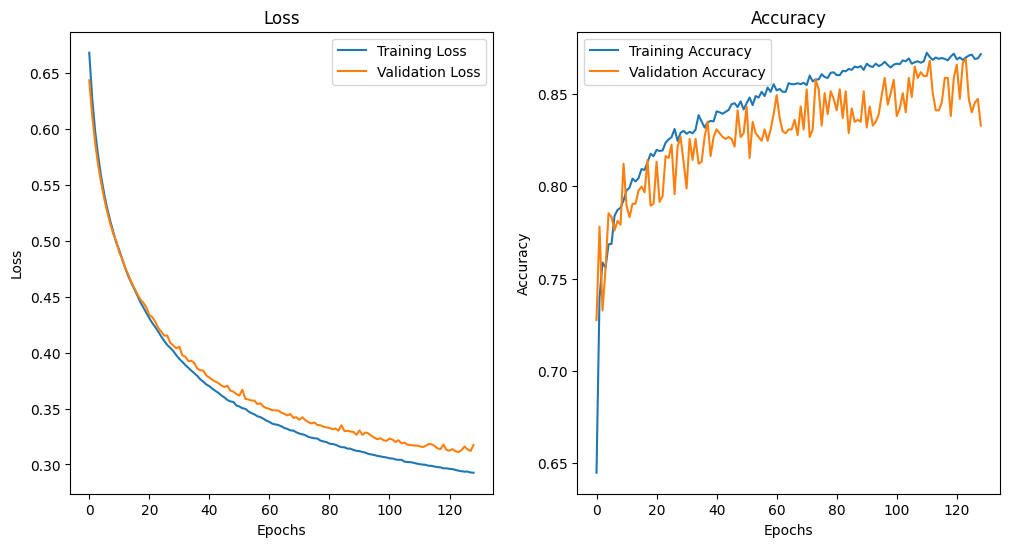


Training with optimizer=SGD, learning_rate=0.001
Epoch 1/250
121/122 [============================>.] - ETA: 0s - loss: 0.7203 - accuracy: 0.5000
Epoch 1: val_accuracy improved from -inf to 0.49948, saving model to best_model_VGG16.h5
122/122 [==============================] - 7s 46ms/step - loss: 0.7203 - accuracy: 0.5001 - val_loss: 0.6956 - val_accuracy: 0.4995
Epoch 2/250
121/122 [============================>.] - ETA: 0s - loss: 0.6938 - accuracy: 0.4788
Epoch 2: val_accuracy improved from 0.49948 to 0.58204, saving model to best_model_VGG16.h5
122/122 [==============================] - 5s 41ms/step - loss: 0.6938 - accuracy: 0.4790 - val_loss: 0.6927 - val_accuracy: 0.5820
Epoch 3/250
121/122 [============================>.] - ETA: 0s - loss: 0.6928 - accuracy: 0.5331
Epoch 3: val_accuracy did not improve from 0.58204
122/122 [==============================] - 5s 37ms/step - loss: 0.6928 - accuracy: 0.5334 - val_loss: 0.6921 - val_accuracy: 0.4881
Epoch 4/250
121/122 [==========

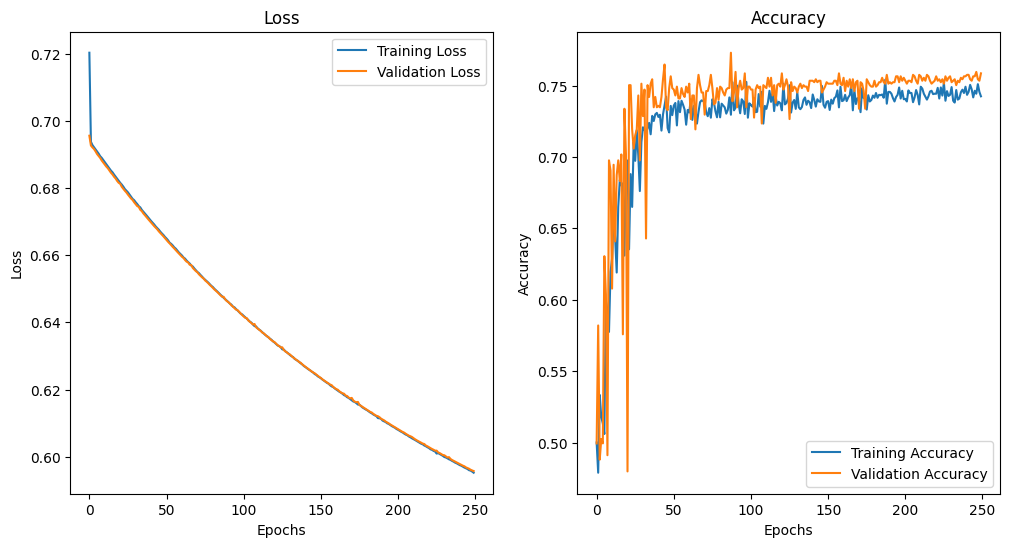

Best Model Parameters: {'optimizer': 'NAdam', 'learning_rate': 0.001}
Best Validation Accuracy: 0.868937075138092
31/31 [==============================] - 1s 26ms/step


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

# Initialize the best model and its score
best_model = None
best_score = 0
best_params = {}

# Define the parameter grid
learning_rates = [1e-4, 1e-3]
optimizers = ['NAdam', 'SGD']

# Loop over the grid search parameters
for learning_rate in learning_rates:
    for optimizer_name in optimizers:
        print(f"\nTraining with optimizer={optimizer_name}, learning_rate={learning_rate}")
        model = create_vgg16_model(optimizer=optimizer_name, learning_rate=learning_rate)

        # Save the best model checkpoint
        filepath = "best_model_VGG16.h5"
        checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

        # Early stopping to avoid overfitting
        early_stopping = EarlyStopping(monitor='val_loss', patience=5)

        # Fit the model
        history = model.fit(
            X_train, Y_train,
            validation_data=(X_test, Y_test),
            epochs=250,
            callbacks=[checkpoint, early_stopping],
            verbose=1
        )

        # Evaluate the model
        val_accuracy = max(history.history['val_accuracy'])
        print(f"Validation accuracy: {val_accuracy}")

        # If this model is the best so far, store its information
        if val_accuracy > best_score:
            best_score = val_accuracy
            best_model = model
            best_params = {'optimizer': optimizer_name, 'learning_rate': learning_rate}

        # Display the loss and accuracy plots
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.show()

# Summarize best results
print(f"Best Model Parameters: {best_params}")
print(f"Best Validation Accuracy: {best_score}")

# Save the best model
best_model.save(filepath)

# Predict with the best model
best_model_predictions = best_model.predict(X_test, batch_size=32)
# Ensure the predictions are in the correct shape
if best_model_predictions.shape[1] == 2:  # Check if the predictions are for both classes
    best_model_predictions = np.argmax(best_model_predictions, axis=1)  # Get the class with the highest probability
else:
    best_model_predictions = (best_model_predictions > 0.5).astype("int32").flatten()


              precision    recall  f1-score   support

           0       0.90      0.74      0.82       484
           1       0.78      0.92      0.85       485

    accuracy                           0.83       969
   macro avg       0.84      0.83      0.83       969
weighted avg       0.84      0.83      0.83       969



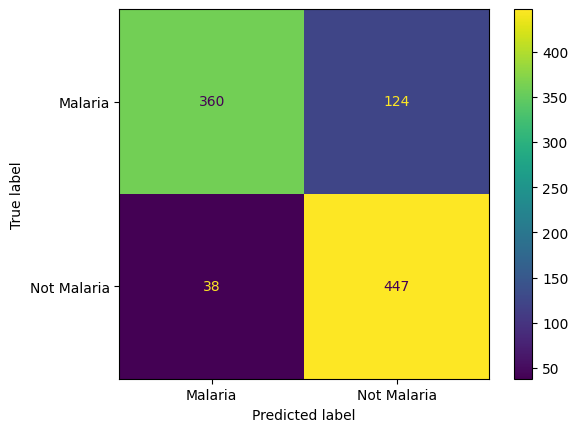

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

if Y_test.ndim > 1 and Y_test.shape[1] > 1:
    Y_test = Y_test.argmax(axis=1)

# Generate the classification report
print(classification_report(Y_test, best_model_predictions))

# Compute the confusion matrix
cm = confusion_matrix(Y_test, best_model_predictions)

# Plot the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels).plot()
plt.show()

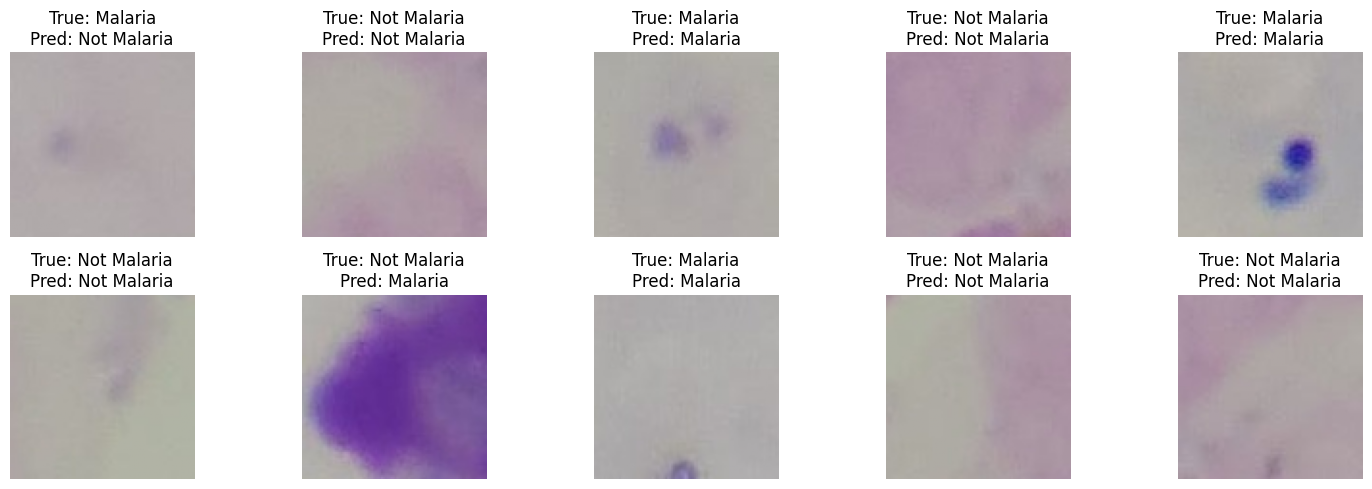

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def display_image_predictions(images, true_labels, predicted_labels, class_labels, num_images=10):
    # Select a random set of images from the dataset
    indices = np.random.choice(range(len(images)), num_images)

    plt.figure(figsize=(15, 5))
    for i, index in enumerate(indices):
        ax = plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(images[index])
        plt.axis('off')

        # If true_labels is one-hot encoded, convert to integers
        if true_labels.ndim > 1 and true_labels.shape[1] > 1:
            true_label_idx = true_labels[index].argmax()
        else:
            true_label_idx = int(true_labels[index])  # Make sure it is an integer

        predicted_label_idx = predicted_labels[index]

        # Set the title of the plot to the true label and predicted label
        ax.set_title(f"True: {class_labels[true_label_idx]}\nPred: {class_labels[predicted_label_idx]}")

    plt.tight_layout()  # Adjust the layout
    plt.show()

# Assuming Y_test is one-hot encoded and you've already obtained best_model_predictions
# and your class_labels are defined as before
display_image_predictions(X_test, Y_test, best_model_predictions, class_labels)

# ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50

def create_resnet50_model(optimizer, learning_rate):
    inputs = keras.Input(shape=(96, 96, 3))
    inputs_resized = Resizing(96, 96)(inputs)
    baseModel = ResNet50(weights="imagenet", include_top=False, input_tensor=inputs_resized)
    headModel = GlobalAveragePooling2D()(baseModel.output)
    headModel = Dense(2, activation="sigmoid")(headModel)
    model = Model(inputs=inputs, outputs=headModel)

    for layer in baseModel.layers:
        layer.trainable = False

    opt = Nadam(learning_rate=learning_rate) if optimizer == 'NAdam' else SGD(learning_rate=learning_rate)
    model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
    return model



Training with optimizer=NAdam, learning_rate=0.0001
Epoch 1/250
122/122 [==============================] - ETA: 0s - loss: 0.6981 - accuracy: 0.5001
Epoch 1: val_accuracy improved from -inf to 0.49948, saving model to best_model_ResNet50.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


122/122 [==============================] - 11s 61ms/step - loss: 0.6981 - accuracy: 0.5001 - val_loss: 0.6934 - val_accuracy: 0.4995
Epoch 2/250
121/122 [============================>.] - ETA: 0s - loss: 0.6932 - accuracy: 0.5003
Epoch 2: val_accuracy did not improve from 0.49948
122/122 [==============================] - 5s 37ms/step - loss: 0.6932 - accuracy: 0.5001 - val_loss: 0.6928 - val_accuracy: 0.4995
Epoch 3/250
120/122 [============================>.] - ETA: 0s - loss: 0.6929 - accuracy: 0.5130
Epoch 3: val_accuracy improved from 0.49948 to 0.64087, saving model to best_model_ResNet50.h5
122/122 [==============================] - 5s 39ms/step - loss: 0.6929 - accuracy: 0.5138 - val_loss: 0.6927 - val_accuracy: 0.6409
Epoch 4/250
120/122 [============================>.] - ETA: 0s - loss: 0.6929 - accuracy: 0.5047
Epoch 4: val_accuracy did not improve from 0.64087
122/122 [==============================] - 4s 30ms/step - loss: 0.6929 - accuracy: 0.5035 - val_loss: 0.6927 - val_

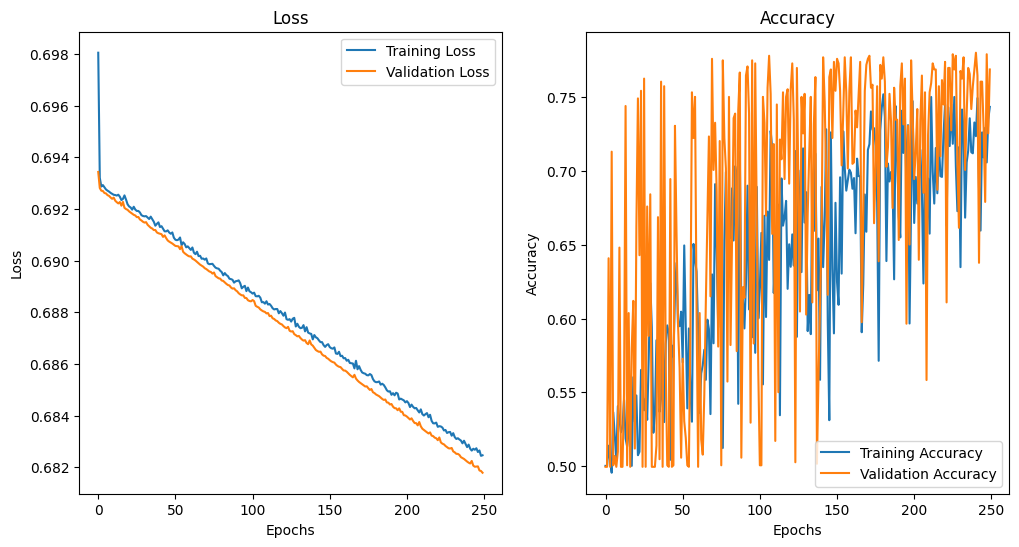


Training with optimizer=SGD, learning_rate=0.0001
Epoch 1/250
122/122 [==============================] - ETA: 0s - loss: 0.7020 - accuracy: 0.5001
Epoch 1: val_accuracy improved from -inf to 0.49948, saving model to best_model_ResNet50.h5
122/122 [==============================] - 10s 55ms/step - loss: 0.7020 - accuracy: 0.5001 - val_loss: 0.6979 - val_accuracy: 0.4995
Epoch 2/250
121/122 [============================>.] - ETA: 0s - loss: 0.6961 - accuracy: 0.5000
Epoch 2: val_accuracy did not improve from 0.49948
122/122 [==============================] - 4s 36ms/step - loss: 0.6961 - accuracy: 0.5001 - val_loss: 0.6948 - val_accuracy: 0.4995
Epoch 3/250
121/122 [============================>.] - ETA: 0s - loss: 0.6943 - accuracy: 0.5003
Epoch 3: val_accuracy did not improve from 0.49948
122/122 [==============================] - 4s 34ms/step - loss: 0.6943 - accuracy: 0.5001 - val_loss: 0.6938 - val_accuracy: 0.4995
Epoch 4/250
120/122 [============================>.] - ETA: 0s - lo

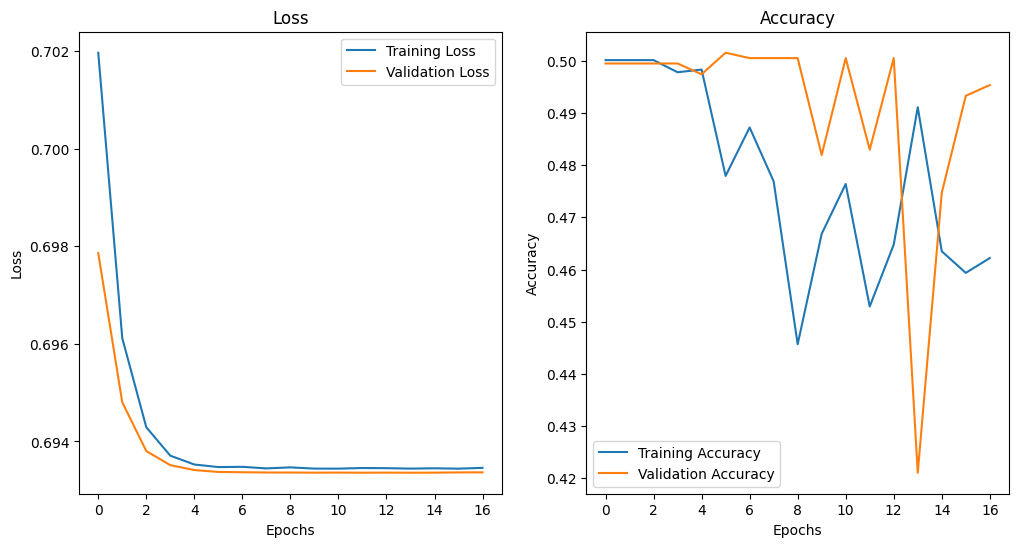


Training with optimizer=NAdam, learning_rate=0.001
Epoch 1/250
121/122 [============================>.] - ETA: 0s - loss: 0.6946 - accuracy: 0.5057
Epoch 1: val_accuracy improved from -inf to 0.50774, saving model to best_model_ResNet50.h5
122/122 [==============================] - 10s 55ms/step - loss: 0.6946 - accuracy: 0.5055 - val_loss: 0.6928 - val_accuracy: 0.5077
Epoch 2/250
121/122 [============================>.] - ETA: 0s - loss: 0.6935 - accuracy: 0.5028
Epoch 2: val_accuracy did not improve from 0.50774
122/122 [==============================] - 4s 31ms/step - loss: 0.6935 - accuracy: 0.5027 - val_loss: 0.6925 - val_accuracy: 0.4995
Epoch 3/250
120/122 [============================>.] - ETA: 0s - loss: 0.6928 - accuracy: 0.5133
Epoch 3: val_accuracy did not improve from 0.50774
122/122 [==============================] - 4s 36ms/step - loss: 0.6928 - accuracy: 0.5130 - val_loss: 0.6936 - val_accuracy: 0.4995
Epoch 4/250
121/122 [============================>.] - ETA: 0s - l

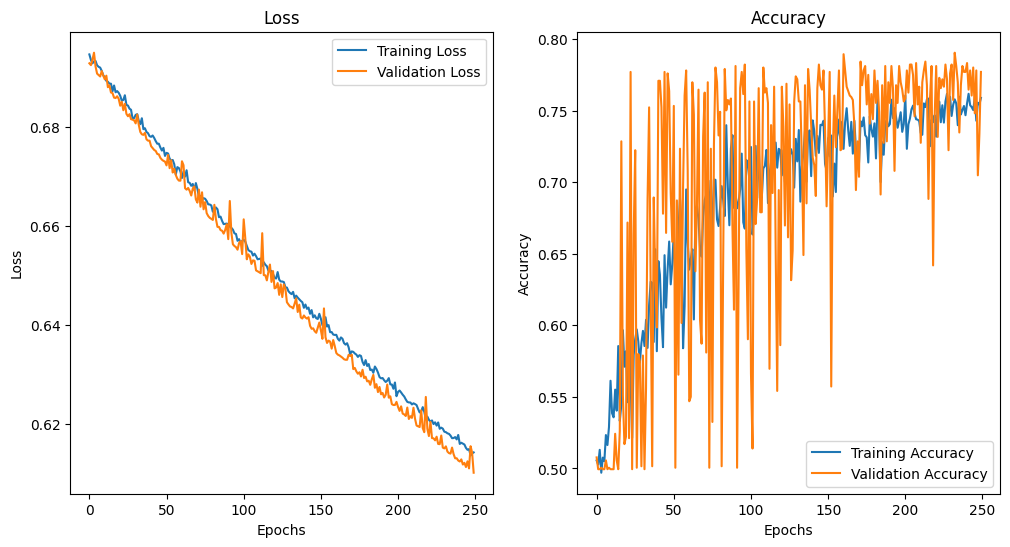


Training with optimizer=SGD, learning_rate=0.001
Epoch 1/250
121/122 [============================>.] - ETA: 0s - loss: 0.6945 - accuracy: 0.5077
Epoch 1: val_accuracy improved from -inf to 0.50052, saving model to best_model_ResNet50.h5
122/122 [==============================] - 9s 50ms/step - loss: 0.6945 - accuracy: 0.5074 - val_loss: 0.6936 - val_accuracy: 0.5005
Epoch 2/250
120/122 [============================>.] - ETA: 0s - loss: 0.6935 - accuracy: 0.5010
Epoch 2: val_accuracy did not improve from 0.50052
122/122 [==============================] - 4s 36ms/step - loss: 0.6935 - accuracy: 0.5004 - val_loss: 0.6930 - val_accuracy: 0.4995
Epoch 3/250
120/122 [============================>.] - ETA: 0s - loss: 0.6931 - accuracy: 0.5109
Epoch 3: val_accuracy did not improve from 0.50052
122/122 [==============================] - 4s 37ms/step - loss: 0.6931 - accuracy: 0.5099 - val_loss: 0.6931 - val_accuracy: 0.5005
Epoch 4/250
120/122 [============================>.] - ETA: 0s - loss

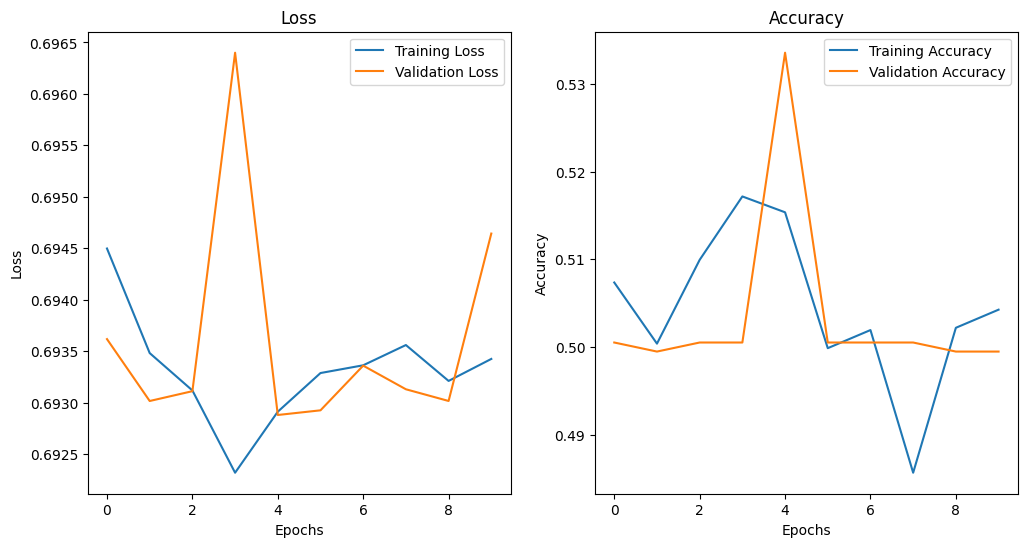

Best Model Parameters: {'optimizer': 'NAdam', 'learning_rate': 0.001}
Best Validation Accuracy: 0.7905056476593018
31/31 [==============================] - 2s 24ms/step


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

# Initialize the best model and its score
best_model = None
best_score = 0
best_params = {}

# Define the parameter grid
learning_rates = [1e-4, 1e-3]
optimizers = ['NAdam', 'SGD']

# Loop over the grid search parameters
for learning_rate in learning_rates:
    for optimizer_name in optimizers:
        print(f"\nTraining with optimizer={optimizer_name}, learning_rate={learning_rate}")
        model = create_resnet50_model(optimizer=optimizer_name, learning_rate=learning_rate)

        # Save the best model checkpoint
        filepath = "best_model_ResNet50.h5"
        checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

        # Early stopping to avoid overfitting
        early_stopping = EarlyStopping(monitor='val_loss', patience=5)

        # Fit the model
        history = model.fit(
            X_train, Y_train,
            validation_data=(X_test, Y_test),
            epochs=250,
            callbacks=[checkpoint, early_stopping],
            verbose=1
        )

        # Evaluate the model
        val_accuracy = max(history.history['val_accuracy'])
        print(f"Validation accuracy: {val_accuracy}")

        # If this model is the best so far, store its information
        if val_accuracy > best_score:
            best_score = val_accuracy
            best_model = model
            best_params = {'optimizer': optimizer_name, 'learning_rate': learning_rate}

        # Display the loss and accuracy plots
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.show()

# Summarize best results
print(f"Best Model Parameters: {best_params}")
print(f"Best Validation Accuracy: {best_score}")

# Save the best model
best_model.save(filepath)

# Predict with the best model
best_model_predictions = best_model.predict(X_test, batch_size=32)
# Ensure the predictions are in the correct shape
if best_model_predictions.shape[1] == 2:  # Check if the predictions are for both classes
    best_model_predictions = np.argmax(best_model_predictions, axis=1)  # Get the class with the highest probability
else:
    best_model_predictions = (best_model_predictions > 0.5).astype("int32").flatten()


              precision    recall  f1-score   support

           0       0.92      0.61      0.73       484
           1       0.71      0.95      0.81       485

    accuracy                           0.78       969
   macro avg       0.81      0.78      0.77       969
weighted avg       0.81      0.78      0.77       969



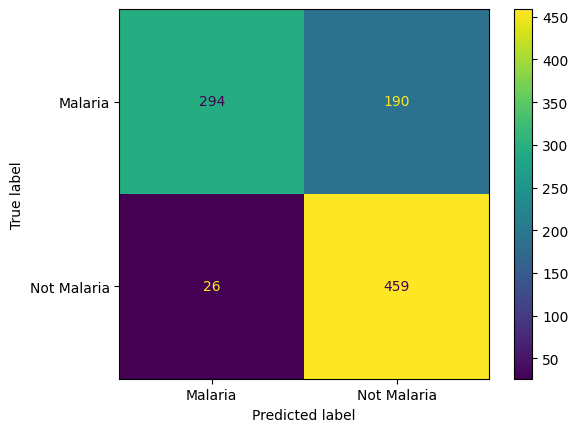

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

if Y_test.ndim > 1 and Y_test.shape[1] > 1:
    Y_test = Y_test.argmax(axis=1)

# Generate the classification report
print(classification_report(Y_test, best_model_predictions))

# Compute the confusion matrix
cm = confusion_matrix(Y_test, best_model_predictions)

# Plot the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels).plot()
plt.show()

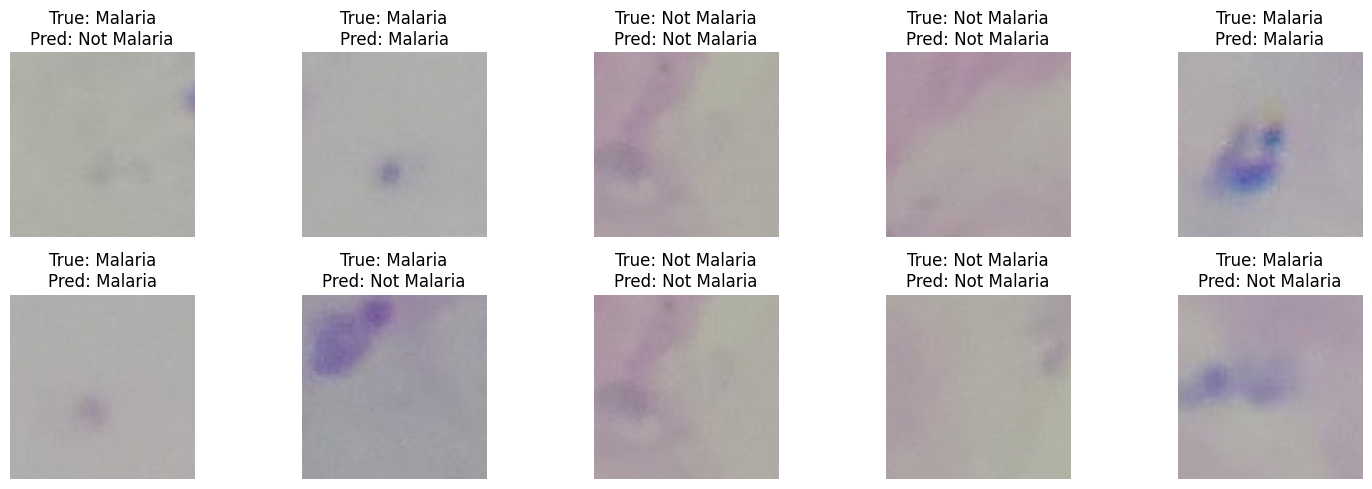

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def display_image_predictions(images, true_labels, predicted_labels, class_labels, num_images=10):
    # Select a random set of images from the dataset
    indices = np.random.choice(range(len(images)), num_images)

    plt.figure(figsize=(15, 5))
    for i, index in enumerate(indices):
        ax = plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(images[index])
        plt.axis('off')

        # If true_labels is one-hot encoded, convert to integers
        if true_labels.ndim > 1 and true_labels.shape[1] > 1:
            true_label_idx = true_labels[index].argmax()
        else:
            true_label_idx = int(true_labels[index])  # Make sure it is an integer

        predicted_label_idx = predicted_labels[index]

        # Set the title of the plot to the true label and predicted label
        ax.set_title(f"True: {class_labels[true_label_idx]}\nPred: {class_labels[predicted_label_idx]}")

    plt.tight_layout()  # Adjust the layout
    plt.show()

# Assuming Y_test is one-hot encoded and you've already obtained best_model_predictions
# and your class_labels are defined as before
display_image_predictions(X_test, Y_test, best_model_predictions, class_labels)

# VIT


Training with adam optimizer and learning rate 0.0001
Epoch 1/100
122/122 [==============================] - 27s 47ms/step - loss: 0.9122 - accuracy: 0.4965 - val_loss: 0.7127 - val_accuracy: 0.4995
Epoch 2/100
122/122 [==============================] - 5s 43ms/step - loss: 0.9006 - accuracy: 0.4898 - val_loss: 0.6910 - val_accuracy: 0.4995
Epoch 3/100
122/122 [==============================] - 6s 52ms/step - loss: 0.8678 - accuracy: 0.5115 - val_loss: 0.6966 - val_accuracy: 0.5005
Epoch 4/100
122/122 [==============================] - 4s 35ms/step - loss: 0.8604 - accuracy: 0.5146 - val_loss: 0.6885 - val_accuracy: 0.4995
Epoch 5/100
122/122 [==============================] - 5s 37ms/step - loss: 0.8393 - accuracy: 0.5040 - val_loss: 0.7006 - val_accuracy: 0.4995
Epoch 6/100
122/122 [==============================] - 5s 41ms/step - loss: 0.7595 - accuracy: 0.5866 - val_loss: 0.6006 - val_accuracy: 0.6718
Epoch 7/100
122/122 [==============================] - 4s 35ms/step - loss: 0.570

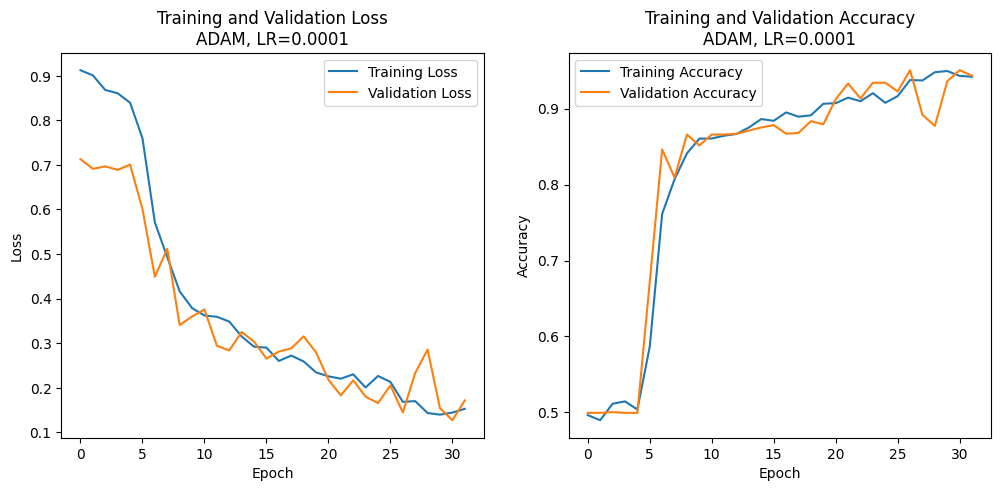

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training with sgd optimizer and learning rate 0.0001
Epoch 1/100
122/122 [==============================] - 16s 52ms/step - loss: 0.9111 - accuracy: 0.5025 - val_loss: 0.6993 - val_accuracy: 0.4995
Epoch 2/100
122/122 [==============================] - 4s 36ms/step - loss: 0.8916 - accuracy: 0.5128 - val_loss: 0.6778 - val_accuracy: 0.5903
Epoch 3/100
122/122 [==============================] - 4s 34ms/step - loss: 0.9035 - accuracy: 0.4994 - val_loss: 0.6753 - val_accuracy: 0.7802
Epoch 4/100
122/122 [==============================] - 5s 44ms/step - loss: 0.8670 - accuracy: 0.5234 - val_loss: 0.7187 - val_accuracy: 0.4995
Epoch 5/100
122/122 [==============================] - 4s 32ms/step - loss: 0.8661 - accuracy: 0.5283 - val_loss: 0.6639 - val_accuracy: 0.5800
Epoch 6/100
122/122 [==============================] - 4s 32ms/step - loss: 0.8517 - accuracy: 0.5365 - val_loss: 0.6541 - val_accuracy: 0.5893
Epoch 7/100
122/122 [==============================] - 5s 38ms/step - loss: 0.8430

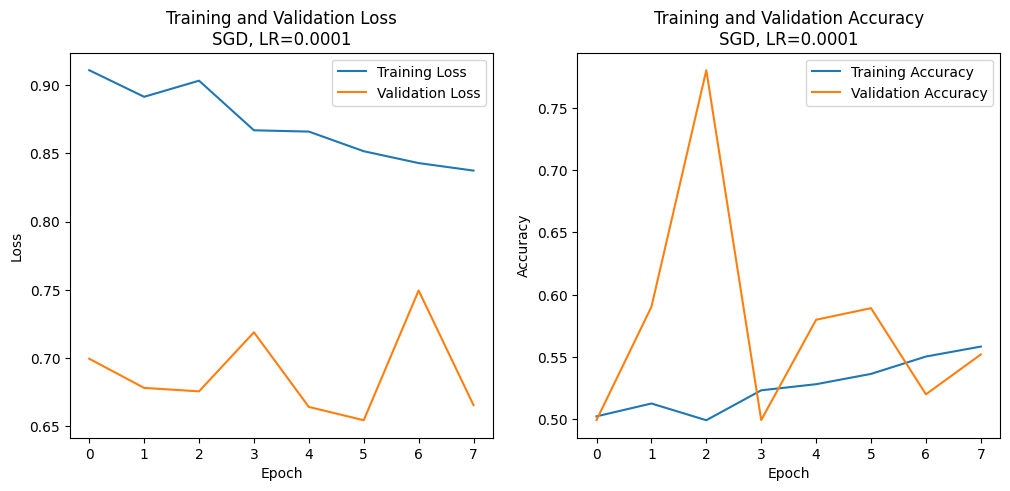

Training with adam optimizer and learning rate 0.001
Epoch 1/100
122/122 [==============================] - 23s 57ms/step - loss: 0.8951 - accuracy: 0.4965 - val_loss: 0.7242 - val_accuracy: 0.4995
Epoch 2/100
122/122 [==============================] - 5s 37ms/step - loss: 0.7778 - accuracy: 0.5009 - val_loss: 0.7089 - val_accuracy: 0.4995
Epoch 3/100
122/122 [==============================] - 5s 43ms/step - loss: 0.7172 - accuracy: 0.5076 - val_loss: 0.6932 - val_accuracy: 0.4995
Epoch 4/100
122/122 [==============================] - 5s 41ms/step - loss: 0.7083 - accuracy: 0.5012 - val_loss: 0.6959 - val_accuracy: 0.4995
Epoch 5/100
122/122 [==============================] - 5s 37ms/step - loss: 0.7084 - accuracy: 0.4924 - val_loss: 0.6934 - val_accuracy: 0.5005
Epoch 6/100
122/122 [==============================] - 6s 51ms/step - loss: 0.7060 - accuracy: 0.4996 - val_loss: 0.6941 - val_accuracy: 0.4995
Epoch 7/100
122/122 [==============================] - 5s 38ms/step - loss: 0.7008

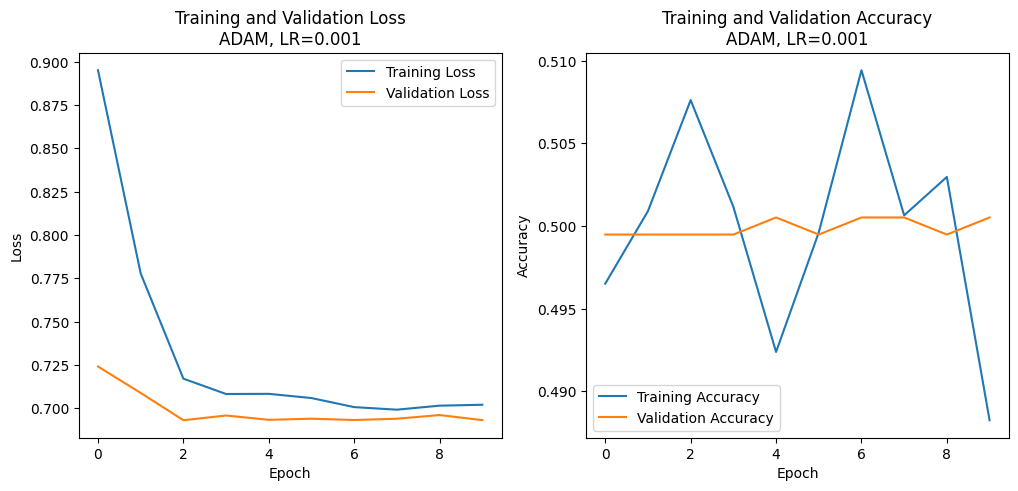

Training with sgd optimizer and learning rate 0.001
Epoch 1/100
122/122 [==============================] - 16s 49ms/step - loss: 0.9006 - accuracy: 0.4975 - val_loss: 0.8913 - val_accuracy: 0.5005
Epoch 2/100
122/122 [==============================] - 6s 50ms/step - loss: 0.8630 - accuracy: 0.5120 - val_loss: 0.7391 - val_accuracy: 0.5005
Epoch 3/100
122/122 [==============================] - 5s 39ms/step - loss: 0.8643 - accuracy: 0.5035 - val_loss: 0.6950 - val_accuracy: 0.4995
Epoch 4/100
122/122 [==============================] - 5s 44ms/step - loss: 0.8148 - accuracy: 0.5437 - val_loss: 0.9798 - val_accuracy: 0.5005
Epoch 5/100
122/122 [==============================] - 6s 47ms/step - loss: 0.8057 - accuracy: 0.5466 - val_loss: 0.8563 - val_accuracy: 0.4995
Epoch 6/100
122/122 [==============================] - 5s 39ms/step - loss: 0.7733 - accuracy: 0.5520 - val_loss: 0.7339 - val_accuracy: 0.4995


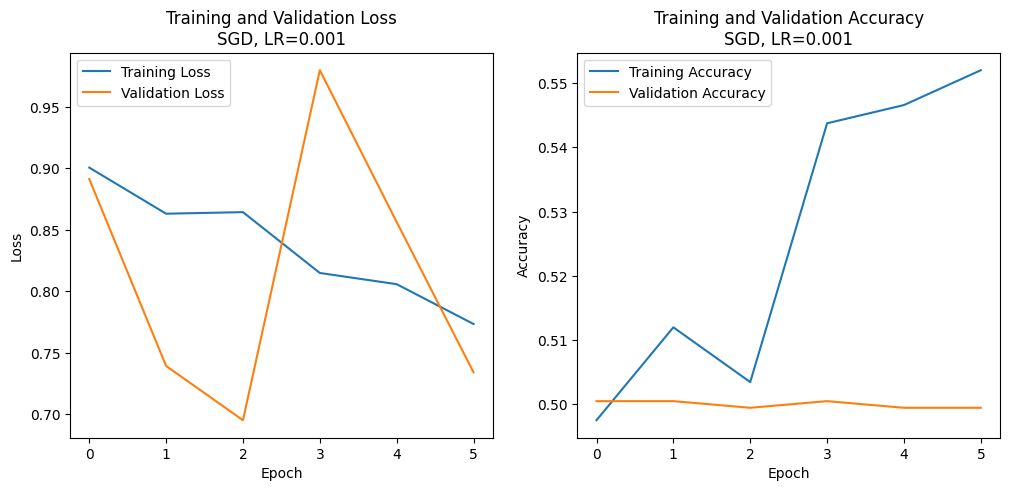

Best parameters found: {'optimizer': 'adam', 'learning_rate': 0.0001}
Best validation accuracy: 0.9504643678665161


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer

# Load your data here
Data = np.load("/content/drive/MyDrive/MalariaP1Data_.npy") / 255.0
Labels = np.load("/content/drive/MyDrive/MalariaP1Labels_.npy")

# Binarize labels and convert to categorical
labels_binarizer = LabelBinarizer()
Labels = labels_binarizer.fit_transform(Labels)
Labels = to_categorical(Labels)

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(Data, Labels, train_size=0.8, stratify=Labels, random_state=42)

class PatchAndPositionEmbedding(layers.Layer):
    def __init__(self, patch_size, num_patches, projection_dim):
        super(PatchAndPositionEmbedding, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

class TransformerBlock(layers.Layer):
    def __init__(self, projection_dim, num_heads):
        super(TransformerBlock, self).__init__()
        self.attention = layers.MultiHeadAttention(num_heads=num_heads, key_dim=projection_dim)
        self.norm1 = layers.LayerNormalization()
        self.norm2 = layers.LayerNormalization()
        self.dense_proj = tf.keras.Sequential(
            [layers.Dense(projection_dim, activation="relu"), layers.Dense(projection_dim)]
        )

    def call(self, inputs):
        attention_output = self.attention(inputs, inputs)
        proj_input = self.norm1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.norm2(proj_input + proj_output)

def create_vit_classifier():
    inputs = layers.Input(shape=(96, 96, 3))
    patches = layers.Conv2D(64, kernel_size=(16, 16), strides=(16, 16), padding="valid")(inputs)
    patches = layers.Reshape((-1, patches.shape[-1]))(patches)
    encoded_patches = PatchAndPositionEmbedding(patch_size=16, num_patches=(96 // 16)**2, projection_dim=64)(patches)
    for _ in range(6):
        encoded_patches = TransformerBlock(projection_dim=64, num_heads=4)(encoded_patches)
    representation = layers.LayerNormalization()(encoded_patches)
    representation = layers.Flatten()(representation)
    features = layers.Dropout(0.5)(representation)
    outputs = layers.Dense(2, activation="sigmoid")(features)
    model = Model(inputs=inputs, outputs=outputs)
    return model

learning_rates = [1e-4, 1e-3]
optimizers = ['adam', 'sgd']
best_accuracy = 0
best_params = {}

for lr in learning_rates:
    for optimizer_name in optimizers:
        print(f"Training with {optimizer_name} optimizer and learning rate {lr}")
        model = create_vit_classifier()
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr) if optimizer_name == 'adam' else tf.keras.optimizers.SGD(learning_rate=lr)
        model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
        callback = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
        history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=32, callbacks=[callback])

        # Plot the loss and accuracy
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Training and Validation Loss\n{optimizer_name.upper()}, LR={lr}')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Training and Validation Accuracy\n{optimizer_name.upper()}, LR={lr}')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

        val_accuracy = max(history.history['val_accuracy'])
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_params = {'optimizer': optimizer_name, 'learning_rate': lr}
            model.save("best_vit_model.h5")

print("Best parameters found:", best_params)
print("Best validation accuracy:", best_accuracy)


In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Dense, Embedding

class PatchAndPositionEmbedding(Layer):
    def __init__(self, patch_size, num_patches, projection_dim):
        super(PatchAndPositionEmbedding, self).__init__()
        self.num_patches = num_patches
        self.projection = Dense(units=projection_dim)
        self.position_embedding = Embedding(input_dim=num_patches, output_dim=projection_dim)

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

class TransformerBlock(Layer):
    def __init__(self, projection_dim, num_heads):
        super(TransformerBlock, self).__init__()
        self.attention = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=projection_dim)
        self.norm1 = tf.keras.layers.LayerNormalization()
        self.norm2 = tf.keras.layers.LayerNormalization()
        self.dense_proj = tf.keras.Sequential([
            Dense(projection_dim, activation="relu"),
            Dense(projection_dim)
        ])

    def call(self, inputs):
        attention_output = self.attention(inputs, inputs)
        proj_input = self.norm1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.norm2(proj_input + proj_output)


In [5]:
from tensorflow.keras.models import load_model

custom_objects = {
    'PatchAndPositionEmbedding': PatchAndPositionEmbedding,
    'TransformerBlock': TransformerBlock
}

best_model = load_model('/content/best_vit_model.h5', custom_objects=custom_objects)


31/31 [==============================] - 1s 29ms/step
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       484
           1       0.95      0.95      0.95       485

    accuracy                           0.95       969
   macro avg       0.95      0.95      0.95       969
weighted avg       0.95      0.95      0.95       969



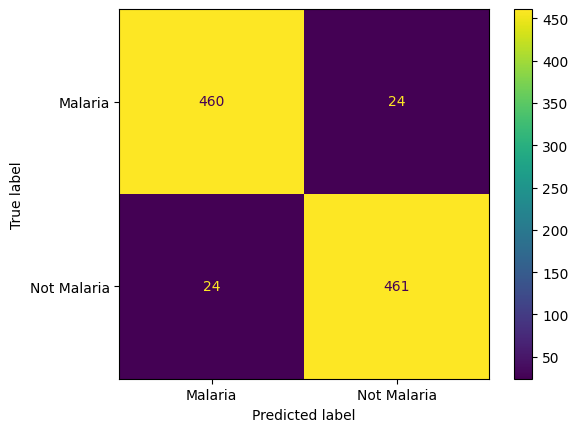

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Assuming the data is loaded and prepared
predictions_raw = best_model.predict(X_test, batch_size=32)

# Process predictions and labels
if predictions_raw.shape[-1] > 1:
    best_model_predictions = np.argmax(predictions_raw, axis=1)
else:
    best_model_predictions = (predictions_raw > 0.5).astype("int32").flatten()

if Y_test.ndim > 1 and Y_test.shape[1] > 1:
    Y_test = np.argmax(Y_test, axis=1)

# Classification report
print(classification_report(Y_test, best_model_predictions))

# Confusion matrix
cm = confusion_matrix(Y_test, best_model_predictions)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Malaria", "Not Malaria"]).plot()
plt.show()